## Importing the req libs

In [2]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

## Download and load the SP500 stock prices data

In [3]:
#Seeing the various df present
sp5002 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp5002

[    Symbol             Security             GICS Sector  \
 0      MMM                   3M             Industrials   
 1      AOS          A. O. Smith             Industrials   
 2      ABT  Abbott Laboratories             Health Care   
 3     ABBV               AbbVie             Health Care   
 4      ACN            Accenture  Information Technology   
 ..     ...                  ...                     ...   
 498    XYL           Xylem Inc.             Industrials   
 499    YUM          Yum! Brands  Consumer Discretionary   
 500   ZBRA   Zebra Technologies  Information Technology   
 501    ZBH        Zimmer Biomet             Health Care   
 502    ZTS               Zoetis             Health Care   
 
                                 GICS Sub-Industry    Headquarters Location  \
 0                        Industrial Conglomerates    Saint Paul, Minnesota   
 1                               Building Products     Milwaukee, Wisconsin   
 2                           Health Care 

In [4]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [5]:
#Replacing the dots in the symbol with '-'
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [6]:
#Checking for any duplicates in the case of symbols
duplicate_symbols = sp500['Symbol'].duplicated()
if duplicate_symbols.any():
    print("Duplicate symbols exist.")
else:
    print("No duplicate symbols.")

No duplicate symbols.


In [7]:
symbols_list = sp500['Symbol'].to_list()
symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',

In [8]:
#Defining the start and end dat to extract data from yf
#End date is todays date and start date 8 yrs back
end_date = dt.date.today().strftime('%Y-%m-%d')
start_date = (dt.date.today() - dt.timedelta(days=8*365)).strftime('%Y-%m-%d')
start_date

'2016-09-30'

In [9]:
end_date

'2024-09-28'

In [10]:
df = yf.download(tickers=symbols_list, 
                 start=start_date, 
                 end=end_date)

[*********************100%%**********************]  503 of 503 completed


In [11]:
df

Price        Adj Close                                                  \
Ticker               A        AAPL        ABBV        ABNB         ABT   
Date                                                                     
2016-09-30   44.332623   26.069174   44.678673         NaN   36.531693   
2016-10-03   44.379704   25.946959   44.792007         NaN   36.756298   
2016-10-04   44.087849   26.057650   44.629086         NaN   36.367569   
2016-10-05   44.389118   26.069174   44.905365         NaN   36.920429   
2016-10-06   44.530327   26.262878   44.508656         NaN   37.119110   
...                ...         ...         ...         ...         ...   
2024-09-23  139.789993  226.470001  193.830002  129.029999  114.809998   
2024-09-24  141.869995  227.369995  193.509995  131.479996  113.339996   
2024-09-25  139.440002  226.369995  191.259995  130.710007  112.610001   
2024-09-26  146.740005  227.520004  191.899994  129.250000  112.730003   
2024-09-27  148.059998  227.789993  194.789993  128.250000  112.430000   

Price                                                                  ...  \
Ticker            ACGL         ACN        ADBE         ADI        ADM  ...   
Date                                                                   ...   
2016-09-30   26.420000  107.262154  108.540001   55.191544  33.616398  ...   
2016-10-03   26.306667  106.112030  108.449997   55.020271  34.198322  ...   
2016-10-04   26.480000  103.811714  108.389999   55.011707  34.110634  ...   
2016-10-05   25.766666  103.785385  108.800003   55.388512  34.493275  ...   
2016-10-06   25.680000  104.057564  108.559998   55.439877  34.405594  ...   
...                ...         ...         ...         ...        ...  ...   
2024-09-23  113.660004  339.209991  527.869995  226.009995  60.910000  ...   
2024-09-24  113.349998  339.619995  524.070007  227.330002  60.730000  ...   
2024-09-25  113.070000  337.049988  517.900024  226.639999  58.139999  ...   
2024-09-26  112.570000  355.809998  515.380005  232.460007  59.369999  ...   
2024-09-27  113.410004  349.700012  515.479980  232.050003  60.000000  ...   

Price        Volume                                                           \
Ticker          WTW       WY      WYNN      XEL       XOM      XYL       YUM   
Date                                                                           
2016-09-30  1461900  3920200   6737900  4039100  15961500  1070100   5022623   
2016-10-03  1142100  2998600   4234900  3110700   7111200   884600   4435899   
2016-10-04  1068500  3604000   3288400  4653000   8222000  1232400   5586395   
2016-10-05   700200  3842300   2699600  3977600   8796200  1063200  12595505   
2016-10-06   767200  3766400   1969200  3740600   7718300   993700  12005999   
...             ...      ...       ...      ...       ...      ...       ...   
2024-09-23   509100  3323700   1646700  2006200  16066300   739500   2140700   
2024-09-24   422900  3528100   4888100  4888100  11984900  1373100   2697000   
2024-09-25   682700  5299100   2244100  2882900  13816000   971800   1396100   
2024-09-26   541700  4791200   8289500  2031500  16887900   847000   2573000   
2024-09-27   366643  4716594  11074127  1726568  11466905   679772   2778310   

Price                                 
Ticker          ZBH    ZBRA      ZTS  
Date                                  
2016-09-30  1433039  394900  3971600  
2016-10-03  1099216  334300  2412700  
2016-10-04   678770  257600  3189800  
2016-10-05  1006001  398300  2607500  
2016-10-06   700400  395400  2702500  
...             ...     ...      ...  
2024-09-23  1292900  342600  1315700  
2024-09-24  1374700  230100  2045100  
2024-09-25  1312600  207100  1906300  
2024-09-26  1211700  242000  1556100  
2024-09-27  1160611  193337  1343665  

[2011 rows x 3018 columns]

In [12]:
df2 = df.stack()
df2

Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2016-09-30 A        44.332623   47.090000   47.320000   46.299999   46.500000   
           AAPL     26.069174   28.262501   28.342501   27.950001   28.115000   
           ABBV     44.678673   63.070000   63.259998   62.450001   62.669998   
           ABT      36.531693   42.290001   42.470001   41.689999   41.740002   
           ACGL     26.420000   26.420000   26.756666   26.333332   26.756666   
...                       ...         ...         ...         ...         ...   
2024-09-27 XYL     134.509995  134.509995  136.279999  133.779999  134.660004   
           YUM     139.919998  139.919998  140.020004  137.520004  137.520004   
           ZBH     108.220001  108.220001  110.192001  108.190002  108.769997   
           ZBRA    368.600006  368.600006  374.029999  368.269989  372.299988   
           ZTS     194.809998  194.809998  197.509995  194.414993  195.649994   

Price                   Volume  
Date       Ticker               
2016-09-30 A         1754300.0  
           AAPL    145516400.0  
           ABBV      7325400.0  
           ABT       7451000.0  
           ACGL      1460700.0  
...                        ...  
2024-09-27 XYL        679772.0  
           YUM       2778310.0  
           ZBH       1160611.0  
           ZBRA       193337.0  
           ZTS       1343665.0  

[990295 rows x 6 columns]

In [14]:
df2.index.names = ['Date', 'Ticker']
df2

Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2016-09-30 A        44.332623   47.090000   47.320000   46.299999   46.500000   
           AAPL     26.069174   28.262501   28.342501   27.950001   28.115000   
           ABBV     44.678673   63.070000   63.259998   62.450001   62.669998   
           ABT      36.531693   42.290001   42.470001   41.689999   41.740002   
           ACGL     26.420000   26.420000   26.756666   26.333332   26.756666   
...                       ...         ...         ...         ...         ...   
2024-09-27 XYL     134.509995  134.509995  136.279999  133.779999  134.660004   
           YUM     139.919998  139.919998  140.020004  137.520004  137.520004   
           ZBH     108.220001  108.220001  110.192001  108.190002  108.769997   
           ZBRA    368.600006  368.600006  374.029999  368.269989  372.299988   
           ZTS     194.809998  194.809998  197.509995  194.414993  195.649994   

Price                   Volume  
Date       Ticker               
2016-09-30 A         1754300.0  
           AAPL    145516400.0  
           ABBV      7325400.0  
           ABT       7451000.0  
           ACGL      1460700.0  
...                        ...  
2024-09-27 XYL        679772.0  
           YUM       2778310.0  
           ZBH       1160611.0  
           ZBRA       193337.0  
           ZTS       1343665.0  

[990295 rows x 6 columns]

## Calculate features and technical indicators for each stock. 

### Technical Indicators that are going to be used. 
 1. Garman-Klass Volatility
 2. RSI
 3. Bollinger Bands
 4. ATR
 5. MACD
 6. Dollar Volume

### 1. Garman Klass Volatility

![Garman-Klass Volatility](garmankls.png)

In [15]:
df2["garman_kls_vol"] = (np.log(df2['High']) - np.log(df2['Low']))**2/2 - (2*np.log(2)-1)*(np.log(df2['Adj Close'])-np.log(df2['Open']))**2

In [16]:
df2

Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2016-09-30 A        44.332623   47.090000   47.320000   46.299999   46.500000   
           AAPL     26.069174   28.262501   28.342501   27.950001   28.115000   
           ABBV     44.678673   63.070000   63.259998   62.450001   62.669998   
           ABT      36.531693   42.290001   42.470001   41.689999   41.740002   
           ACGL     26.420000   26.420000   26.756666   26.333332   26.756666   
...                       ...         ...         ...         ...         ...   
2024-09-27 XYL     134.509995  134.509995  136.279999  133.779999  134.660004   
           YUM     139.919998  139.919998  140.020004  137.520004  137.520004   
           ZBH     108.220001  108.220001  110.192001  108.190002  108.769997   
           ZBRA    368.600006  368.600006  374.029999  368.269989  372.299988   
           ZTS     194.809998  194.809998  197.509995  194.414993  195.649994   

Price                   Volume  garman_kls_vol  
Date       Ticker                               
2016-09-30 A         1754300.0       -0.000643  
           AAPL    145516400.0       -0.002108  
           ABBV      7325400.0       -0.044150  
           ABT       7451000.0       -0.006690  
           ACGL      1460700.0        0.000065  
...                        ...             ...  
2024-09-27 XYL        679772.0        0.000171  
           YUM       2778310.0        0.000047  
           ZBH       1160611.0        0.000158  
           ZBRA       193337.0        0.000082  
           ZTS       1343665.0        0.000118  

[990295 rows x 7 columns]

### 2. RSI

In [17]:
df2["rsi"] = df2.groupby(level=1) ['Adj Close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

In [18]:
df2

Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2016-09-30 A        44.332623   47.090000   47.320000   46.299999   46.500000   
           AAPL     26.069174   28.262501   28.342501   27.950001   28.115000   
           ABBV     44.678673   63.070000   63.259998   62.450001   62.669998   
           ABT      36.531693   42.290001   42.470001   41.689999   41.740002   
           ACGL     26.420000   26.420000   26.756666   26.333332   26.756666   
...                       ...         ...         ...         ...         ...   
2024-09-27 XYL     134.509995  134.509995  136.279999  133.779999  134.660004   
           YUM     139.919998  139.919998  140.020004  137.520004  137.520004   
           ZBH     108.220001  108.220001  110.192001  108.190002  108.769997   
           ZBRA    368.600006  368.600006  374.029999  368.269989  372.299988   
           ZTS     194.809998  194.809998  197.509995  194.414993  195.649994   

Price                   Volume  garman_kls_vol        rsi  
Date       Ticker                                          
2016-09-30 A         1754300.0       -0.000643        NaN  
           AAPL    145516400.0       -0.002108        NaN  
           ABBV      7325400.0       -0.044150        NaN  
           ABT       7451000.0       -0.006690        NaN  
           ACGL      1460700.0        0.000065        NaN  
...                        ...             ...        ...  
2024-09-27 XYL        679772.0        0.000171  52.810998  
           YUM       2778310.0        0.000047  62.536185  
           ZBH       1160611.0        0.000158  48.599342  
           ZBRA       193337.0        0.000082  64.223784  
           ZTS       1343665.0        0.000118  61.511367  

[990295 rows x 8 columns]

<Axes: xlabel='Date'>

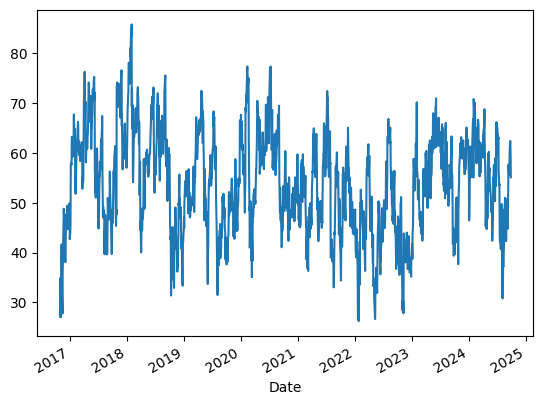

In [19]:
#RSI graph of Amazon
df2.xs('AMZN', level=1)['rsi'].plot()

<Axes: xlabel='Date'>

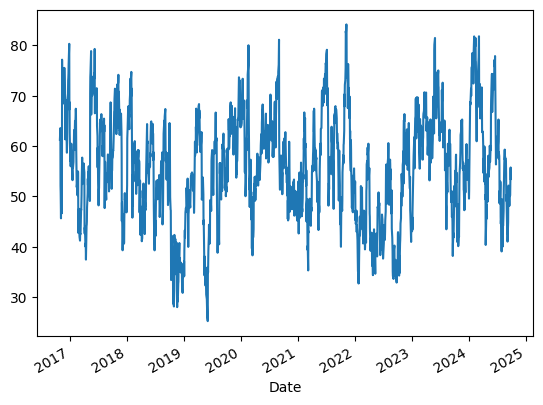

In [20]:
df2.xs('NVDA', level=1) ['rsi'].plot()

### 3. Bollinger Bands

In [21]:
pandas_ta.bbands(close=df2.xs('AAPL', level=1) ['Adj Close'], lenght=20)

,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
Date,,,,,
2016-09-30,NaN,NaN,NaN,NaN,NaN
2016-10-03,NaN,NaN,NaN,NaN,NaN
2016-10-04,NaN,NaN,NaN,NaN,NaN
2016-10-05,NaN,NaN,NaN,NaN,NaN
2016-10-06,25.877458,26.081167,26.284876,1.562116,0.946008
...,...,...,...,...,...
2024-09-23,214.815071,224.203998,233.592925,8.375343,0.620674
2024-09-24,220.464490,226.319998,232.175507,5.174539,0.589659
2024-09-25,225.514469,227.455997,229.397524,1.707167,0.220323


The first column is the lower band, second middle band and the third is the upper band. 

In [22]:
#Lower band
df2['bb_low'] = df2.groupby(level=1)['Adj Close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), lenght=20).iloc[:,0])

#Middle band
df2['bb_mid'] = df2.groupby(level=1)['Adj Close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), lenght=20).iloc[:,1])

#Upper band
df2['bb_upper'] = df2.groupby(level=1)['Adj Close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), lenght=20).iloc[:,2])

In [23]:
df2

Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2016-09-30 A        44.332623   47.090000   47.320000   46.299999   46.500000   
           AAPL     26.069174   28.262501   28.342501   27.950001   28.115000   
           ABBV     44.678673   63.070000   63.259998   62.450001   62.669998   
           ABT      36.531693   42.290001   42.470001   41.689999   41.740002   
           ACGL     26.420000   26.420000   26.756666   26.333332   26.756666   
...                       ...         ...         ...         ...         ...   
2024-09-27 XYL     134.509995  134.509995  136.279999  133.779999  134.660004   
           YUM     139.919998  139.919998  140.020004  137.520004  137.520004   
           ZBH     108.220001  108.220001  110.192001  108.190002  108.769997   
           ZBRA    368.600006  368.600006  374.029999  368.269989  372.299988   
           ZTS     194.809998  194.809998  197.509995  194.414993  195.649994   

Price                   Volume  garman_kls_vol        rsi    bb_low    bb_mid  \
Date       Ticker                                                               
2016-09-30 A         1754300.0       -0.000643        NaN       NaN       NaN   
           AAPL    145516400.0       -0.002108        NaN       NaN       NaN   
           ABBV      7325400.0       -0.044150        NaN       NaN       NaN   
           ABT       7451000.0       -0.006690        NaN       NaN       NaN   
           ACGL      1460700.0        0.000065        NaN       NaN       NaN   
...                        ...             ...        ...       ...       ...   
2024-09-27 XYL        679772.0        0.000171  52.810998  4.896570  4.904970   
           YUM       2778310.0        0.000047  62.536185  4.861790  4.912698   
           ZBH       1160611.0        0.000158  48.599342  4.676716  4.687307   
           ZBRA       193337.0        0.000082  64.223784  5.888980  5.906213   
           ZTS       1343665.0        0.000118  61.511367  5.258968  5.271430   

Price              bb_upper  
Date       Ticker            
2016-09-30 A            NaN  
           AAPL         NaN  
           ABBV         NaN  
           ABT          NaN  
           ACGL         NaN  
...                     ...  
2024-09-27 XYL     4.913369  
           YUM     4.963606  
           ZBH     4.697899  
           ZBRA    5.923445  
           ZTS     5.283893  

[990295 rows x 11 columns]

### 4. ATR

In [24]:
pandas_ta.atr(high=df2['High'], 
              low=df2['Low'], 
              close=df2['Close'], 
              lenght=14)

Date        Ticker
2016-09-30  A                NaN
            AAPL             NaN
            ABBV             NaN
            ABT              NaN
            ACGL             NaN
                         ...    
2024-09-27  XYL       115.883468
            YUM       107.999650
            ZBH       102.551817
            ZBRA      114.213116
            ZTS       118.496823
Name: ATRr_14, Length: 990295, dtype: float64

In [25]:
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close'], length=14)
    # Normalizing ATR
    normalized_atr = atr.sub(atr.mean()).div(atr.std())
    return normalized_atr

# Example usage with a DataFrame named df2
# Assuming df2 is defined elsewhere and has the columns 'High', 'Low', and 'Close'
normalized_atr = compute_atr(df2)
# If you want to assign this to a new column in df2, ensure normalized_atr is a Series
df2['normalized_atr'] = normalized_atr

In [26]:
df2

Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2016-09-30 A        44.332623   47.090000   47.320000   46.299999   46.500000   
           AAPL     26.069174   28.262501   28.342501   27.950001   28.115000   
           ABBV     44.678673   63.070000   63.259998   62.450001   62.669998   
           ABT      36.531693   42.290001   42.470001   41.689999   41.740002   
           ACGL     26.420000   26.420000   26.756666   26.333332   26.756666   
...                       ...         ...         ...         ...         ...   
2024-09-27 XYL     134.509995  134.509995  136.279999  133.779999  134.660004   
           YUM     139.919998  139.919998  140.020004  137.520004  137.520004   
           ZBH     108.220001  108.220001  110.192001  108.190002  108.769997   
           ZBRA    368.600006  368.600006  374.029999  368.269989  372.299988   
           ZTS     194.809998  194.809998  197.509995  194.414993  195.649994   

Price                   Volume  garman_kls_vol        rsi    bb_low    bb_mid  \
Date       Ticker                                                               
2016-09-30 A         1754300.0       -0.000643        NaN       NaN       NaN   
           AAPL    145516400.0       -0.002108        NaN       NaN       NaN   
           ABBV      7325400.0       -0.044150        NaN       NaN       NaN   
           ABT       7451000.0       -0.006690        NaN       NaN       NaN   
           ACGL      1460700.0        0.000065        NaN       NaN       NaN   
...                        ...             ...        ...       ...       ...   
2024-09-27 XYL        679772.0        0.000171  52.810998  4.896570  4.904970   
           YUM       2778310.0        0.000047  62.536185  4.861790  4.912698   
           ZBH       1160611.0        0.000158  48.599342  4.676716  4.687307   
           ZBRA       193337.0        0.000082  64.223784  5.888980  5.906213   
           ZTS       1343665.0        0.000118  61.511367  5.258968  5.271430   

Price              bb_upper  normalized_atr  
Date       Ticker                            
2016-09-30 A            NaN             NaN  
           AAPL         NaN             NaN  
           ABBV         NaN             NaN  
           ABT          NaN             NaN  
           ACGL         NaN             NaN  
...                     ...             ...  
2024-09-27 XYL     4.913369       -0.203937  
           YUM     4.963606       -0.277708  
           ZBH     4.697899       -0.328685  
           ZBRA    5.923445       -0.219567  
           ZTS     5.283893       -0.179483  

[990295 rows x 12 columns]

### 5. MACD

In [27]:
import pandas as pd
import pandas_ta as ta

In [28]:
def compute_macd(close):
    # Debugging: Check the input series
    if close is None or close.empty:
        raise ValueError("The 'close' series is None or empty.")
    
    # Debugging: Print the first few values of the 'close' series
    print("Close series head:", close.head())
    
    # Debugging: Print the length of the 'close' series
    print("Length of close series:", len(close))
    
    # Check if the series has enough data points
    if len(close) < 26:  # 26 is the slow period for MACD
        raise ValueError("The 'close' series does not have enough data points to calculate MACD.")
    
    # Calculate MACD
    macd = pandas_ta.macd(close=close, fast=12, slow=26, signal=9)
    
    # Debugging: Check if macd is None
    if macd is None:
        print("MACD calculation returned None. Input series:")
        print(close)
        raise ValueError("The 'macd' calculation returned None.")
    
    # Debugging: Print the MACD DataFrame
    print("MACD DataFrame head:", macd.head())
    
    macd = macd.iloc[:, 0]
    macd_norm = macd.sub(macd.mean()).div(macd.std())
    return macd_norm

# Ensure df2 is not None
if df2 is None:
    raise ValueError("df2 is None. Please check the DataFrame initialization.")

# Ensure df2 has a MultiIndex
if not isinstance(df2.index, pd.MultiIndex):
    df2 = df2.set_index(['Date', 'Ticker'])

# Assuming 'Close' is a column in df2
if 'Close' not in df2.columns:
    raise ValueError("'Close' column is missing in df2.")

# Debugging: Print the first few rows of df2
print("df2 head:", df2.head())

# Filter out groups with less than 26 data points
filtered_df2 = df2.groupby(level=1).filter(lambda x: len(x) >= 26)

# Compute normalized MACD and add it to df2
try:
    df2['normalised_macd'] = filtered_df2.groupby(level=1, group_keys=False)['Close'].apply(compute_macd)
except Exception as e:
    print("Error during MACD calculation:", e)
    raise

df2 head: Price              Adj Close      Close       High        Low       Open  \
Date       Ticker                                                          
2016-09-30 A       44.332623  47.090000  47.320000  46.299999  46.500000   
           AAPL    26.069174  28.262501  28.342501  27.950001  28.115000   
           ABBV    44.678673  63.070000  63.259998  62.450001  62.669998   
           ABT     36.531693  42.290001  42.470001  41.689999  41.740002   
           ACGL    26.420000  26.420000  26.756666  26.333332  26.756666   

Price                   Volume  garman_kls_vol  rsi  bb_low  bb_mid  bb_upper  \
Date       Ticker                                                               
2016-09-30 A         1754300.0       -0.000643  NaN     NaN     NaN       NaN   
           AAPL    145516400.0       -0.002108  NaN     NaN     NaN       NaN   
           ABBV      7325400.0       -0.044150  NaN     NaN     NaN       NaN   
           ABT       7451000.0       -0.006690  NaN 

In [29]:
df2

Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2016-09-30 A        44.332623   47.090000   47.320000   46.299999   46.500000   
           AAPL     26.069174   28.262501   28.342501   27.950001   28.115000   
           ABBV     44.678673   63.070000   63.259998   62.450001   62.669998   
           ABT      36.531693   42.290001   42.470001   41.689999   41.740002   
           ACGL     26.420000   26.420000   26.756666   26.333332   26.756666   
...                       ...         ...         ...         ...         ...   
2024-09-27 XYL     134.509995  134.509995  136.279999  133.779999  134.660004   
           YUM     139.919998  139.919998  140.020004  137.520004  137.520004   
           ZBH     108.220001  108.220001  110.192001  108.190002  108.769997   
           ZBRA    368.600006  368.600006  374.029999  368.269989  372.299988   
           ZTS     194.809998  194.809998  197.509995  194.414993  195.649994   

Price                   Volume  garman_kls_vol        rsi    bb_low    bb_mid  \
Date       Ticker                                                               
2016-09-30 A         1754300.0       -0.000643        NaN       NaN       NaN   
           AAPL    145516400.0       -0.002108        NaN       NaN       NaN   
           ABBV      7325400.0       -0.044150        NaN       NaN       NaN   
           ABT       7451000.0       -0.006690        NaN       NaN       NaN   
           ACGL      1460700.0        0.000065        NaN       NaN       NaN   
...                        ...             ...        ...       ...       ...   
2024-09-27 XYL        679772.0        0.000171  52.810998  4.896570  4.904970   
           YUM       2778310.0        0.000047  62.536185  4.861790  4.912698   
           ZBH       1160611.0        0.000158  48.599342  4.676716  4.687307   
           ZBRA       193337.0        0.000082  64.223784  5.888980  5.906213   
           ZTS       1343665.0        0.000118  61.511367  5.258968  5.271430   

Price              bb_upper  normalized_atr  normalised_macd  
Date       Ticker                                             
2016-09-30 A            NaN             NaN              NaN  
           AAPL         NaN             NaN              NaN  
           ABBV         NaN             NaN              NaN  
           ABT          NaN             NaN              NaN  
           ACGL         NaN             NaN              NaN  
...                     ...             ...              ...  
2024-09-27 XYL     4.913369       -0.203937         0.041883  
           YUM     4.963606       -0.277708         0.056000  
           ZBH     4.697899       -0.328685        -0.284446  
           ZBRA    5.923445       -0.219567         1.039265  
           ZTS     5.283893       -0.179483         0.893731  

[990295 rows x 13 columns]

### 6. Dollar Volume

In [30]:
df2['dollar_vol'] = (df2['Adj Close']*df2['Volume'])/1e6
df2

Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2016-09-30 A        44.332623   47.090000   47.320000   46.299999   46.500000   
           AAPL     26.069174   28.262501   28.342501   27.950001   28.115000   
           ABBV     44.678673   63.070000   63.259998   62.450001   62.669998   
           ABT      36.531693   42.290001   42.470001   41.689999   41.740002   
           ACGL     26.420000   26.420000   26.756666   26.333332   26.756666   
...                       ...         ...         ...         ...         ...   
2024-09-27 XYL     134.509995  134.509995  136.279999  133.779999  134.660004   
           YUM     139.919998  139.919998  140.020004  137.520004  137.520004   
           ZBH     108.220001  108.220001  110.192001  108.190002  108.769997   
           ZBRA    368.600006  368.600006  374.029999  368.269989  372.299988   
           ZTS     194.809998  194.809998  197.509995  194.414993  195.649994   

Price                   Volume  garman_kls_vol        rsi    bb_low    bb_mid  \
Date       Ticker                                                               
2016-09-30 A         1754300.0       -0.000643        NaN       NaN       NaN   
           AAPL    145516400.0       -0.002108        NaN       NaN       NaN   
           ABBV      7325400.0       -0.044150        NaN       NaN       NaN   
           ABT       7451000.0       -0.006690        NaN       NaN       NaN   
           ACGL      1460700.0        0.000065        NaN       NaN       NaN   
...                        ...             ...        ...       ...       ...   
2024-09-27 XYL        679772.0        0.000171  52.810998  4.896570  4.904970   
           YUM       2778310.0        0.000047  62.536185  4.861790  4.912698   
           ZBH       1160611.0        0.000158  48.599342  4.676716  4.687307   
           ZBRA       193337.0        0.000082  64.223784  5.888980  5.906213   
           ZTS       1343665.0        0.000118  61.511367  5.258968  5.271430   

Price              bb_upper  normalized_atr  normalised_macd   dollar_vol  
Date       Ticker                                                          
2016-09-30 A            NaN             NaN              NaN    77.772720  
           AAPL         NaN             NaN              NaN  3793.492324  
           ABBV         NaN             NaN              NaN   327.289150  
           ABT          NaN             NaN              NaN   272.197641  
           ACGL         NaN             NaN              NaN    38.591694  
...                     ...             ...              ...          ...  
2024-09-27 XYL     4.913369       -0.203937         0.041883    91.436128  
           YUM     4.963606       -0.277708         0.056000   388.741130  
           ZBH     4.697899       -0.328685        -0.284446   125.601324  
           ZBRA    5.923445       -0.219567         1.039265    71.264019  
           ZTS     5.283893       -0.179483         0.893731   261.759375  

[990295 rows x 14 columns]

## Aggregate on monthly level and filter for each month only top 150 most liquid stocks.

#### mainly doing this to reduce the training time and experiment with features and various strategies. 

##### for all of the indicators we'll be taking the month end value for reference and for dollar volume we'll be taking monthly avg. 

In [31]:
df2.unstack('Ticker')['dollar_vol'].resample('M').mean().stack('Ticker').to_frame('dollar_vol')

dollar_vol
Date       Ticker             
2016-09-30 A         77.772720
           AAPL    3793.492324
           ABBV     327.289150
           ABT      272.197641
           ACGL      38.591694
...                        ...
2024-09-30 XYL      160.484507
           YUM      287.368762
           ZBH      193.078309
           ZBRA     121.580434
           ZTS      369.222407

[47761 rows x 1 columns]

In [32]:
#only taking the technical indicators
last_cols = [c for c in df2.columns.unique(0) if c not in ['dollar_vol', 'High', 'Low', 'Open', 'Close', 'Volume']]
last_cols

['Adj Close',
 'garman_kls_vol',
 'rsi',
 'bb_low',
 'bb_mid',
 'bb_upper',
 'normalized_atr',
 'normalised_macd']

In [33]:
df2.unstack()[last_cols].resample('M').last().stack('Ticker')

Price               Adj Close  garman_kls_vol        rsi    bb_low    bb_mid  \
Date       Ticker                                                              
2016-09-30 A        44.332623       -0.000643        NaN       NaN       NaN   
           AAPL     26.069174       -0.002108        NaN       NaN       NaN   
           ABBV     44.678673       -0.044150        NaN       NaN       NaN   
           ABT      36.531693       -0.006690        NaN       NaN       NaN   
           ACGL     26.420000        0.000065        NaN       NaN       NaN   
...                       ...             ...        ...       ...       ...   
2024-09-30 XYL     134.509995        0.000171  52.810998  4.896570  4.904970   
           YUM     139.919998        0.000047  62.536185  4.861790  4.912698   
           ZBH     108.220001        0.000158  48.599342  4.676716  4.687307   
           ZBRA    368.600006        0.000082  64.223784  5.888980  5.906213   
           ZTS     194.809998        0.000118  61.511367  5.258968  5.271430   

Price              bb_upper  normalized_atr  normalised_macd  
Date       Ticker                                             
2016-09-30 A            NaN             NaN              NaN  
           AAPL         NaN             NaN              NaN  
           ABBV         NaN             NaN              NaN  
           ABT          NaN             NaN              NaN  
           ACGL         NaN             NaN              NaN  
...                     ...             ...              ...  
2024-09-30 XYL     4.913369       -0.203937         0.041883  
           YUM     4.963606       -0.277708         0.056000  
           ZBH     4.697899       -0.328685        -0.284446  
           ZBRA    5.923445       -0.219567         1.039265  
           ZTS     5.283893       -0.179483         0.893731  

[47761 rows x 8 columns]

In [34]:
data = pd.concat([df2.unstack('Ticker')['dollar_vol'].resample('M').mean().stack('Ticker').to_frame('dollar_vol'), df2.unstack()[last_cols].resample('M').last().stack('Ticker')], axis=1).dropna()

In [35]:
data

dollar_vol   Adj Close  garman_kls_vol        rsi  \
Date       Ticker                                                       
2016-11-30 A        107.566352   41.404747       -0.002152  42.999882   
           AAPL    3498.943124   25.616608       -0.002666  46.201190   
           ABBV     400.728809   43.467735       -0.046891  50.117817   
           ABT      293.371446   33.095364       -0.009455  38.566219   
           ACGL      28.556549   27.573334        0.000048  64.834110   
...                        ...         ...             ...        ...   
2024-09-30 XYL      160.484507  134.509995        0.000171  52.810998   
           YUM      287.368762  139.919998        0.000047  62.536185   
           ZBH      193.078309  108.220001        0.000158  48.599342   
           ZBRA     121.580434  368.600006        0.000082  64.223784   
           ZTS      369.222407  194.809998        0.000118  61.511367   

                     bb_low    bb_mid  bb_upper  normalized_atr  \
Date       Ticker                                                 
2016-11-30 A       3.734078  3.754727  3.775376       -0.951535   
           AAPL    3.280863  3.288419  3.295975       -0.964619   
           ABBV    3.767330  3.789994  3.812658       -0.964873   
           ABT     3.527354  3.545957  3.564559       -0.972782   
           ACGL    3.334964  3.345155  3.355345       -0.988234   
...                     ...       ...       ...             ...   
2024-09-30 XYL     4.896570  4.904970  4.913369       -0.203937   
           YUM     4.861790  4.912698  4.963606       -0.277708   
           ZBH     4.676716  4.687307  4.697899       -0.328685   
           ZBRA    5.888980  5.906213  5.923445       -0.219567   
           ZTS     5.258968  5.271430  5.283893       -0.179483   

                   normalised_macd  
Date       Ticker                   
2016-11-30 A             -0.378827  
           AAPL          -0.378953  
           ABBV          -0.336754  
           ABT           -0.666002  
           ACGL           0.018620  
...                            ...  
2024-09-30 XYL            0.041883  
           YUM            0.056000  
           ZBH           -0.284446  
           ZBRA           1.039265  
           ZTS            0.893731  

[46776 rows x 9 columns]

Calculating the 5-yr rolling average of dollar volume for each stocks before filtering

After this we'll filter out the top 150 most liquid stocks. 

In [36]:
data['dollar_vol'] = data.loc[:, 'dollar_vol'].unstack('Ticker').rolling(5*12, min_periods=12).mean().stack()
data

dollar_vol   Adj Close  garman_kls_vol        rsi  \
Date       Ticker                                                      
2016-11-30 A              NaN   41.404747       -0.002152  42.999882   
           AAPL           NaN   25.616608       -0.002666  46.201190   
           ABBV           NaN   43.467735       -0.046891  50.117817   
           ABT            NaN   33.095364       -0.009455  38.566219   
           ACGL           NaN   27.573334        0.000048  64.834110   
...                       ...         ...             ...        ...   
2024-09-30 XYL     117.817582  134.509995        0.000171  52.810998   
           YUM     200.975799  139.919998        0.000047  62.536185   
           ZBH     177.283544  108.220001        0.000158  48.599342   
           ZBRA    125.512145  368.600006        0.000082  64.223784   
           ZTS     337.872602  194.809998        0.000118  61.511367   

                     bb_low    bb_mid  bb_upper  normalized_atr  \
Date       Ticker                                                 
2016-11-30 A       3.734078  3.754727  3.775376       -0.951535   
           AAPL    3.280863  3.288419  3.295975       -0.964619   
           ABBV    3.767330  3.789994  3.812658       -0.964873   
           ABT     3.527354  3.545957  3.564559       -0.972782   
           ACGL    3.334964  3.345155  3.355345       -0.988234   
...                     ...       ...       ...             ...   
2024-09-30 XYL     4.896570  4.904970  4.913369       -0.203937   
           YUM     4.861790  4.912698  4.963606       -0.277708   
           ZBH     4.676716  4.687307  4.697899       -0.328685   
           ZBRA    5.888980  5.906213  5.923445       -0.219567   
           ZTS     5.258968  5.271430  5.283893       -0.179483   

                   normalised_macd  
Date       Ticker                   
2016-11-30 A             -0.378827  
           AAPL          -0.378953  
           ABBV          -0.336754  
           ABT           -0.666002  
           ACGL           0.018620  
...                            ...  
2024-09-30 XYL            0.041883  
           YUM            0.056000  
           ZBH           -0.284446  
           ZBRA           1.039265  
           ZTS            0.893731  

[46776 rows x 9 columns]

In [37]:
data['dollar_vol_rank'] = data.groupby('Date')['dollar_vol'].rank(ascending=False)
data

dollar_vol   Adj Close  garman_kls_vol        rsi  \
Date       Ticker                                                      
2016-11-30 A              NaN   41.404747       -0.002152  42.999882   
           AAPL           NaN   25.616608       -0.002666  46.201190   
           ABBV           NaN   43.467735       -0.046891  50.117817   
           ABT            NaN   33.095364       -0.009455  38.566219   
           ACGL           NaN   27.573334        0.000048  64.834110   
...                       ...         ...             ...        ...   
2024-09-30 XYL     117.817582  134.509995        0.000171  52.810998   
           YUM     200.975799  139.919998        0.000047  62.536185   
           ZBH     177.283544  108.220001        0.000158  48.599342   
           ZBRA    125.512145  368.600006        0.000082  64.223784   
           ZTS     337.872602  194.809998        0.000118  61.511367   

                     bb_low    bb_mid  bb_upper  normalized_atr  \
Date       Ticker                                                 
2016-11-30 A       3.734078  3.754727  3.775376       -0.951535   
           AAPL    3.280863  3.288419  3.295975       -0.964619   
           ABBV    3.767330  3.789994  3.812658       -0.964873   
           ABT     3.527354  3.545957  3.564559       -0.972782   
           ACGL    3.334964  3.345155  3.355345       -0.988234   
...                     ...       ...       ...             ...   
2024-09-30 XYL     4.896570  4.904970  4.913369       -0.203937   
           YUM     4.861790  4.912698  4.963606       -0.277708   
           ZBH     4.676716  4.687307  4.697899       -0.328685   
           ZBRA    5.888980  5.906213  5.923445       -0.219567   
           ZTS     5.258968  5.271430  5.283893       -0.179483   

                   normalised_macd  dollar_vol_rank  
Date       Ticker                                    
2016-11-30 A             -0.378827              NaN  
           AAPL          -0.378953              NaN  
           ABBV          -0.336754              NaN  
           ABT           -0.666002              NaN  
           ACGL           0.018620              NaN  
...                            ...              ...  
2024-09-30 XYL            0.041883            395.0  
           YUM            0.056000            263.0  
           ZBH           -0.284446            289.0  
           ZBRA           1.039265            378.0  
           ZTS            0.893731            148.0  

[46776 rows x 10 columns]

In [38]:
data = data[data['dollar_vol_rank']<150].drop(['dollar_vol', 'dollar_vol_rank'], axis=1)
data

Adj Close  garman_kls_vol        rsi    bb_low    bb_mid  \
Date       Ticker                                                              
2017-10-31 AAPL     39.667992       -0.001105  69.196712  3.606952  3.666683   
           ABBV     66.876785       -0.036142  55.247811  4.205141  4.224653   
           ABT      48.237457       -0.005677  53.844850  3.889080  3.909916   
           ACN     128.834717       -0.004274  69.365305  4.855296  4.866609   
           ADBE    175.160004        0.000067  70.089319  5.147803  5.169403   
...                       ...             ...        ...       ...       ...   
2024-09-30 VZ       44.889999        0.000074  65.041488  3.810898  3.819810   
           WFC      55.900002        0.000008  51.187900  3.988709  4.025787   
           WMT      79.779999        0.000036  63.358678  4.385341  4.399596   
           XOM     115.820000        0.000182  51.821142  4.729716  4.758304   
           ZTS     194.809998        0.000118  61.511367  5.258968  5.271430   

                   bb_upper  normalized_atr  normalised_macd  
Date       Ticker                                             
2017-10-31 AAPL    3.726414       -0.881064        -0.081953  
           ABBV    4.244164       -0.877027         0.438522  
           ABT     3.930752       -0.882194         0.233053  
           ACN     4.877921       -0.851484         0.263315  
           ADBE    5.191002       -0.859713         0.556017  
...                     ...             ...              ...  
2024-09-30 VZ      3.828722        0.464720         1.557849  
           WFC     4.062864        0.090827        -0.212577  
           WMT     4.413850        0.026363         2.535908  
           XOM     4.786892       -0.135252        -0.122624  
           ZTS     5.283893       -0.179483         0.893731  

[12516 rows x 8 columns]

##### We have aggregrated monthly data for all of the technical features

## Calculate monthly returns for different time-horizons to add to features.

Capturing time series dynamics that reflect, for ex - momentum patterns, we will compute the historical returns using '.pct_change(lag)' method, that is the returns over various monthly periods as identified by lags. 

In [39]:
def calculate_returns(df):

    outlier_cutoff = 0.005

    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:

        df[f'return_{lag}m'] = (df['Adj Close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                     upper=x.quantile(1-outlier_cutoff)))
                              .add(1)
                              .pow(1/lag)
                              .sub(1))
    return df
    
    
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data

Adj Close  garman_kls_vol        rsi    bb_low    bb_mid  \
Date       Ticker                                                              
2018-10-31 AAPL     52.135620       -0.000440  50.232935  3.933334  3.960306   
           ABBV     59.937771       -0.033812  30.334086  4.108995  4.144632   
           ABT      62.445816       -0.003318  51.539004  4.114046  4.133468   
           ACN     145.218872       -0.001825  44.756038  4.947427  4.970122   
           ADBE    245.759995        0.000288  46.518480  5.461200  5.503190   
...                       ...             ...        ...       ...       ...   
2024-09-30 VRTX    462.880005        0.000068  43.105640  6.132940  6.138061   
           VZ       44.889999        0.000074  65.041488  3.810898  3.819810   
           WFC      55.900002        0.000008  51.187900  3.988709  4.025787   
           WMT      79.779999        0.000036  63.358678  4.385341  4.399596   
           XOM     115.820000        0.000182  51.821142  4.729716  4.758304   

                   bb_upper  normalized_atr  normalised_macd  return_1m  \
Date       Ticker                                                         
2018-10-31 AAPL    3.987277       -0.877925        -0.451094  -0.030478   
           ABBV    4.180268       -0.889281        -2.055007  -0.168082   
           ABT     4.152891       -0.911545        -0.547030  -0.056387   
           ACN     4.992818       -0.850319        -0.999178  -0.065449   
           ADBE    5.545180       -0.820125        -0.676738  -0.089609   
...                     ...             ...              ...        ...   
2024-09-30 VRTX    6.143181        0.703036        -1.428791  -0.066567   
           VZ      3.828722        0.464720         1.557849   0.074438   
           WFC     4.062864        0.090827        -0.212577  -0.043954   
           WMT     4.413850        0.026363         2.535908   0.033018   
           XOM     4.786892       -0.135252        -0.122624  -0.017975   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
Date       Ticker                                                          
2018-10-31 AAPL    -0.019453   0.048955   0.049216   0.031518    0.023037  
           ABBV    -0.089585  -0.051576  -0.031893  -0.035910   -0.009087  
           ABT      0.017673   0.018393   0.030307   0.013075    0.021747  
           ACN     -0.030053  -0.000564   0.008483  -0.000163    0.010026  
           ADBE    -0.034267   0.001469   0.017396   0.023294    0.028623  
...                      ...        ...        ...        ...         ...  
2024-09-30 VRTX    -0.033691  -0.004171   0.017139   0.014428    0.024121  
           VZ       0.052544   0.034253   0.016772   0.025153    0.029510  
           WFC     -0.025718  -0.017496  -0.003800   0.016536    0.028964  
           WMT      0.079634   0.057205   0.049051   0.047915    0.033843  
           XOM     -0.007778   0.004705   0.002084   0.019343    0.001616  

[10367 rows x 14 columns]

## Download Fama-French Factors and Calculate Rolling Factor Betas.

We will introduce the Fama—French data to estimate the exposure of assets to common risk factors using linear regression.

The five Fama—French factors, namely market risk, size, value, operating profitability, and investment have been shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models.

We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.


In [73]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench', 
                               start='2016')[0].drop('RF', axis=1)

factor_data.index = factor_data.index.to_timestamp()

factor_data

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2016-01-01,-5.77,-3.47,2.09,2.81,3.07
2016-02-01,-0.07,0.88,-0.57,3.25,2.02
2016-03-01,6.96,1.07,1.19,0.77,-0.08
2016-04-01,0.91,1.23,3.28,-2.97,1.90
2016-05-01,1.78,-0.61,-1.66,-1.09,-2.49
...,...,...,...,...,...
2024-03-01,2.83,-1.18,4.21,1.47,1.19
2024-04-01,-4.67,-2.56,-0.52,1.48,-0.30
2024-05-01,4.34,0.76,-1.66,2.98,-3.07


one thing we immidiately notice is that the dates are set to the start of the month whereas the data is set to the end of the months. additionally the factors above are in percentages. so below we're resampling the factor_data to the end of the month and dividing by 100. 

In [74]:
factor_data = factor_data.resample('M').last().div(100)
factor_data

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2016-01-31,-0.0577,-0.0347,0.0209,0.0281,0.0307
2016-02-29,-0.0007,0.0088,-0.0057,0.0325,0.0202
2016-03-31,0.0696,0.0107,0.0119,0.0077,-0.0008
2016-04-30,0.0091,0.0123,0.0328,-0.0297,0.0190
2016-05-31,0.0178,-0.0061,-0.0166,-0.0109,-0.0249
...,...,...,...,...,...
2024-03-31,0.0283,-0.0118,0.0421,0.0147,0.0119
2024-04-30,-0.0467,-0.0256,-0.0052,0.0148,-0.0030
2024-05-31,0.0434,0.0076,-0.0166,0.0298,-0.0307


In [75]:
factor_data.index.name = 'Date'
factor_data

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2016-01-31,-0.0577,-0.0347,0.0209,0.0281,0.0307
2016-02-29,-0.0007,0.0088,-0.0057,0.0325,0.0202
2016-03-31,0.0696,0.0107,0.0119,0.0077,-0.0008
2016-04-30,0.0091,0.0123,0.0328,-0.0297,0.0190
2016-05-31,0.0178,-0.0061,-0.0166,-0.0109,-0.0249
...,...,...,...,...,...
2024-03-31,0.0283,-0.0118,0.0421,0.0147,0.0119
2024-04-30,-0.0467,-0.0256,-0.0052,0.0148,-0.0030
2024-05-31,0.0434,0.0076,-0.0166,0.0298,-0.0307


In [76]:
print(factor_data.index)

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31',
               ...
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31',
               '2024-06-30', '2024-07-31'],
              dtype='datetime64[ns]', name='Date', length=103, freq='ME')


In [77]:
print(data.index)

MultiIndex([('2018-10-31', 'AAPL'),
            ('2018-10-31', 'ABBV'),
            ('2018-10-31',  'ABT'),
            ('2018-10-31',  'ACN'),
            ('2018-10-31', 'ADBE'),
            ('2018-10-31',  'ADI'),
            ('2018-10-31',  'ADP'),
            ('2018-10-31', 'ADSK'),
            ('2018-10-31',  'AIG'),
            ('2018-10-31', 'AMAT'),
            ...
            ('2024-09-30',  'UNP'),
            ('2024-09-30',  'UPS'),
            ('2024-09-30',  'USB'),
            ('2024-09-30',    'V'),
            ('2024-09-30',  'VLO'),
            ('2024-09-30', 'VRTX'),
            ('2024-09-30',   'VZ'),
            ('2024-09-30',  'WFC'),
            ('2024-09-30',  'WMT'),
            ('2024-09-30',  'XOM')],
           names=['Date', 'Ticker'], length=10367)


In [78]:
factor_data = factor_data.join(data['return_1m']).sort_index()

In [79]:
factor_data

Mkt-RF     SMB    HML     RMW     CMA  return_1m
Date       Ticker                                                  
2018-10-31 AAPL   -0.0768 -0.0445  0.034  0.0095  0.0358  -0.030478
           ABBV   -0.0768 -0.0445  0.034  0.0095  0.0358  -0.168082
           ABT    -0.0768 -0.0445  0.034  0.0095  0.0358  -0.056387
           ACN    -0.0768 -0.0445  0.034  0.0095  0.0358  -0.065449
           ADBE   -0.0768 -0.0445  0.034  0.0095  0.0358  -0.089609
...                   ...     ...    ...     ...     ...        ...
2024-07-31 VRTX    0.0124  0.0833  0.057  0.0017  0.0043   0.057604
           VZ      0.0124  0.0833  0.057  0.0017  0.0043  -0.001379
           WFC     0.0124  0.0833  0.057  0.0017  0.0043  -0.000842
           WMT     0.0124  0.0833  0.057  0.0017  0.0043   0.013735
           XOM     0.0124  0.0833  0.057  0.0017  0.0043   0.030142

[10083 rows x 6 columns]

In [80]:
factor_data.xs('AMZN', level=1).head()

,Mkt-RF,SMB,HML,RMW,CMA,return_1m
Date,,,,,,
2018-10-31,-0.0768,-0.0445,0.0340,0.0095,0.0358,-0.202192
2018-11-30,0.0169,-0.0077,0.0028,-0.0055,0.0039,0.057672
2018-12-31,-0.0957,-0.0288,-0.0188,-0.0003,0.0021,-0.111350
2019-01-31,0.0840,0.0301,-0.0045,-0.0078,-0.0152,0.144317
2019-02-28,0.0340,0.0175,-0.0271,0.0012,-0.0160,-0.045906


In [81]:
factor_data.xs('NVDA', level=1).head()

,Mkt-RF,SMB,HML,RMW,CMA,return_1m
Date,,,,,,
2018-10-31,-0.0768,-0.0445,0.0340,0.0095,0.0358,-0.249769
2018-11-30,0.0169,-0.0077,0.0028,-0.0055,0.0039,-0.224050
2018-12-31,-0.0957,-0.0288,-0.0188,-0.0003,0.0021,-0.183137
2019-01-31,0.0840,0.0301,-0.0045,-0.0078,-0.0152,0.076779
2019-02-28,0.0340,0.0175,-0.0271,0.0012,-0.0160,0.074219


Returns are different but the factors remain the same. Now we're going to filter out the stocks with less than 10 months of data. 

We're doing this as we are going to use rolling window for the regression of around 2 years or 24 months. 

In [82]:
factor_data.groupby(level=1).size()

Ticker
AAPL    70
ABBV    70
ABNB    20
ABT     70
ACN     70
        ..
WDC     45
WFC     70
WMT     70
WYNN    58
XOM     70
Length: 170, dtype: int64

In [83]:
observations = factor_data.groupby(level=1).size()
valid_stocks = observations[observations >= 10]
valid_stocks

Ticker
AAPL    70
ABBV    70
ABNB    20
ABT     70
ACN     70
        ..
WDC     45
WFC     70
WMT     70
WYNN    58
XOM     70
Length: 164, dtype: int64

now we are going to use the valid stock as a filter for the factor data. 

In [84]:
factor_data = factor_data[factor_data.index.get_level_values('Ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF     SMB    HML     RMW     CMA  return_1m
Date       Ticker                                                  
2018-10-31 AAPL   -0.0768 -0.0445  0.034  0.0095  0.0358  -0.030478
           ABBV   -0.0768 -0.0445  0.034  0.0095  0.0358  -0.168082
           ABT    -0.0768 -0.0445  0.034  0.0095  0.0358  -0.056387
           ACN    -0.0768 -0.0445  0.034  0.0095  0.0358  -0.065449
           ADBE   -0.0768 -0.0445  0.034  0.0095  0.0358  -0.089609
...                   ...     ...    ...     ...     ...        ...
2024-07-31 VRTX    0.0124  0.0833  0.057  0.0017  0.0043   0.057604
           VZ      0.0124  0.0833  0.057  0.0017  0.0043  -0.001379
           WFC     0.0124  0.0833  0.057  0.0017  0.0043  -0.000842
           WMT     0.0124  0.0833  0.057  0.0017  0.0043   0.013735
           XOM     0.0124  0.0833  0.057  0.0017  0.0043   0.030142

[10049 rows x 6 columns]

now we're going to calculate the rolling factor betas

In [85]:
betas = (factor_data.groupby(level=1,
                            group_keys=False)
         .apply(lambda x: RollingOLS(endog=x['return_1m'], 
                                     exog=sm.add_constant(x.drop('return_1m', axis=1)),
                                     window=min(24, x.shape[0]),
                                     min_nobs=len(x.columns)+1)
         .fit(params_only=True)
         .params
         .drop('const', axis=1)))

betas 

Mkt-RF       SMB       HML       RMW       CMA
Date       Ticker                                                  
2018-10-31 AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
           ADBE         NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2024-07-31 VRTX    0.569025  0.648189 -0.392910  0.648667  0.140270
           VZ      0.689696 -0.844719  0.631433  0.297127 -0.473040
           WFC     1.111663 -0.130668  1.182282 -0.816393 -0.613397
           WMT     0.476748  0.123753 -0.164168  0.869366  0.094606
           XOM     0.630903 -0.090537  0.297811  0.609449  1.041609

[10049 rows x 5 columns]

now joining the rolling factors data to the main features dataframe

In [ ]:
data = data.join(betas.groupby('Ticker').shift())

In [99]:
data

Adj Close  garman_kls_vol        rsi    bb_low    bb_mid  \
Date       Ticker                                                              
2018-10-31 AAPL     52.135620       -0.000440  50.232935  3.933334  3.960306   
           ABBV     59.937771       -0.033812  30.334086  4.108995  4.144632   
           ABT      62.445816       -0.003318  51.539004  4.114046  4.133468   
           ACN     145.218872       -0.001825  44.756038  4.947427  4.970122   
           ADBE    245.759995        0.000288  46.518480  5.461200  5.503190   
...                       ...             ...        ...       ...       ...   
2024-09-30 VRTX    462.880005        0.000068  43.105640  6.132940  6.138061   
           VZ       44.889999        0.000074  65.041488  3.810898  3.819810   
           WFC      55.900002        0.000008  51.187900  3.988709  4.025787   
           WMT      79.779999        0.000036  63.358678  4.385341  4.399596   
           XOM     115.820000        0.000182  51.821142  4.729716  4.758304   

                   bb_upper  normalized_atr  normalised_macd  return_1m  \
Date       Ticker                                                         
2018-10-31 AAPL    3.987277       -0.877925        -0.451094  -0.030478   
           ABBV    4.180268       -0.889281        -2.055007  -0.168082   
           ABT     4.152891       -0.911545        -0.547030  -0.056387   
           ACN     4.992818       -0.850319        -0.999178  -0.065449   
           ADBE    5.545180       -0.820125        -0.676738  -0.089609   
...                     ...             ...              ...        ...   
2024-09-30 VRTX    6.143181        0.703036        -1.428791  -0.066567   
           VZ      3.828722        0.464720         1.557849   0.074438   
           WFC     4.062864        0.090827        -0.212577  -0.043954   
           WMT     4.413850        0.026363         2.535908   0.033018   
           XOM     4.786892       -0.135252        -0.122624  -0.017975   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
Date       Ticker                                                           
2018-10-31 AAPL    -0.019453   0.048955   0.049216   0.031518    0.023037   
           ABBV    -0.089585  -0.051576  -0.031893  -0.035910   -0.009087   
           ABT      0.017673   0.018393   0.030307   0.013075    0.021747   
           ACN     -0.030053  -0.000564   0.008483  -0.000163    0.010026   
           ADBE    -0.034267   0.001469   0.017396   0.023294    0.028623   
...                      ...        ...        ...        ...         ...   
2024-09-30 VRTX    -0.033691  -0.004171   0.017139   0.014428    0.024121   
           VZ       0.052544   0.034253   0.016772   0.025153    0.029510   
           WFC     -0.025718  -0.017496  -0.003800   0.016536    0.028964   
           WMT      0.079634   0.057205   0.049051   0.047915    0.033843   
           XOM     -0.007778   0.004705   0.002084   0.019343    0.001616   

                   Mkt-RF  SMB  HML  RMW  CMA  
Date       Ticker                              
2018-10-31 AAPL       NaN  NaN  NaN  NaN  NaN  
           ABBV       NaN  NaN  NaN  NaN  NaN  
           ABT        NaN  NaN  NaN  NaN  NaN  
           ACN        NaN  NaN  NaN  NaN  NaN  
           ADBE       NaN  NaN  NaN  NaN  NaN  
...                   ...  ...  ...  ...  ...  
2024-09-30 VRTX       NaN  NaN  NaN  NaN  NaN  
           VZ         NaN  NaN  NaN  NaN  NaN  
           WFC        NaN  NaN  NaN  NaN  NaN  
           WMT        NaN  NaN  NaN  NaN  NaN  
           XOM        NaN  NaN  NaN  NaN  NaN  

[10367 rows x 19 columns]

In [100]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
data.loc[:, factors] = data.groupby('Ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))
data

Adj Close  garman_kls_vol        rsi    bb_low    bb_mid  \
Date       Ticker                                                              
2018-10-31 AAPL     52.135620       -0.000440  50.232935  3.933334  3.960306   
           ABBV     59.937771       -0.033812  30.334086  4.108995  4.144632   
           ABT      62.445816       -0.003318  51.539004  4.114046  4.133468   
           ACN     145.218872       -0.001825  44.756038  4.947427  4.970122   
           ADBE    245.759995        0.000288  46.518480  5.461200  5.503190   
...                       ...             ...        ...       ...       ...   
2024-09-30 VRTX    462.880005        0.000068  43.105640  6.132940  6.138061   
           VZ       44.889999        0.000074  65.041488  3.810898  3.819810   
           WFC      55.900002        0.000008  51.187900  3.988709  4.025787   
           WMT      79.779999        0.000036  63.358678  4.385341  4.399596   
           XOM     115.820000        0.000182  51.821142  4.729716  4.758304   

                   bb_upper  normalized_atr  normalised_macd  return_1m  \
Date       Ticker                                                         
2018-10-31 AAPL    3.987277       -0.877925        -0.451094  -0.030478   
           ABBV    4.180268       -0.889281        -2.055007  -0.168082   
           ABT     4.152891       -0.911545        -0.547030  -0.056387   
           ACN     4.992818       -0.850319        -0.999178  -0.065449   
           ADBE    5.545180       -0.820125        -0.676738  -0.089609   
...                     ...             ...              ...        ...   
2024-09-30 VRTX    6.143181        0.703036        -1.428791  -0.066567   
           VZ      3.828722        0.464720         1.557849   0.074438   
           WFC     4.062864        0.090827        -0.212577  -0.043954   
           WMT     4.413850        0.026363         2.535908   0.033018   
           XOM     4.786892       -0.135252        -0.122624  -0.017975   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
Date       Ticker                                                           
2018-10-31 AAPL    -0.019453   0.048955   0.049216   0.031518    0.023037   
           ABBV    -0.089585  -0.051576  -0.031893  -0.035910   -0.009087   
           ABT      0.017673   0.018393   0.030307   0.013075    0.021747   
           ACN     -0.030053  -0.000564   0.008483  -0.000163    0.010026   
           ADBE    -0.034267   0.001469   0.017396   0.023294    0.028623   
...                      ...        ...        ...        ...         ...   
2024-09-30 VRTX    -0.033691  -0.004171   0.017139   0.014428    0.024121   
           VZ       0.052544   0.034253   0.016772   0.025153    0.029510   
           WFC     -0.025718  -0.017496  -0.003800   0.016536    0.028964   
           WMT      0.079634   0.057205   0.049051   0.047915    0.033843   
           XOM     -0.007778   0.004705   0.002084   0.019343    0.001616   

                     Mkt-RF       SMB       HML       RMW       CMA  
Date       Ticker                                                    
2018-10-31 AAPL    1.312684 -0.302059 -0.627423  0.374401  0.575837  
           ABBV    0.514880  0.396823 -0.190722  0.469825  0.527814  
           ABT     0.768177 -0.073813 -0.435886  0.215582  0.939230  
           ACN     1.212129 -0.206748 -0.240775  0.359077  0.044850  
           ADBE    1.280003 -0.528485 -0.244795  0.298265 -0.465289  
...                     ...       ...       ...       ...       ...  
2024-09-30 VRTX    0.497444  0.054516 -0.842470  0.189347  0.848985  
           VZ      0.462853 -0.463056  0.263105  0.145912  0.159457  
           WFC     1.104115 -0.092379  1.573873 -0.691653 -0.930480  
           WMT     0.629746 -0.366180 -0.372754  0.162505  0.662741  
           XOM     1.045459  0.107149  0.886017 -0.520425  0.375080  

[10367 rows x 19 columns]

In [101]:
data = data.dropna()
data

Adj Close  garman_kls_vol        rsi    bb_low    bb_mid  \
Date       Ticker                                                              
2018-10-31 AAPL     52.135620       -0.000440  50.232935  3.933334  3.960306   
           ABBV     59.937771       -0.033812  30.334086  4.108995  4.144632   
           ABT      62.445816       -0.003318  51.539004  4.114046  4.133468   
           ACN     145.218872       -0.001825  44.756038  4.947427  4.970122   
           ADBE    245.759995        0.000288  46.518480  5.461200  5.503190   
...                       ...             ...        ...       ...       ...   
2024-09-30 VRTX    462.880005        0.000068  43.105640  6.132940  6.138061   
           VZ       44.889999        0.000074  65.041488  3.810898  3.819810   
           WFC      55.900002        0.000008  51.187900  3.988709  4.025787   
           WMT      79.779999        0.000036  63.358678  4.385341  4.399596   
           XOM     115.820000        0.000182  51.821142  4.729716  4.758304   

                   bb_upper  normalized_atr  normalised_macd  return_1m  \
Date       Ticker                                                         
2018-10-31 AAPL    3.987277       -0.877925        -0.451094  -0.030478   
           ABBV    4.180268       -0.889281        -2.055007  -0.168082   
           ABT     4.152891       -0.911545        -0.547030  -0.056387   
           ACN     4.992818       -0.850319        -0.999178  -0.065449   
           ADBE    5.545180       -0.820125        -0.676738  -0.089609   
...                     ...             ...              ...        ...   
2024-09-30 VRTX    6.143181        0.703036        -1.428791  -0.066567   
           VZ      3.828722        0.464720         1.557849   0.074438   
           WFC     4.062864        0.090827        -0.212577  -0.043954   
           WMT     4.413850        0.026363         2.535908   0.033018   
           XOM     4.786892       -0.135252        -0.122624  -0.017975   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
Date       Ticker                                                           
2018-10-31 AAPL    -0.019453   0.048955   0.049216   0.031518    0.023037   
           ABBV    -0.089585  -0.051576  -0.031893  -0.035910   -0.009087   
           ABT      0.017673   0.018393   0.030307   0.013075    0.021747   
           ACN     -0.030053  -0.000564   0.008483  -0.000163    0.010026   
           ADBE    -0.034267   0.001469   0.017396   0.023294    0.028623   
...                      ...        ...        ...        ...         ...   
2024-09-30 VRTX    -0.033691  -0.004171   0.017139   0.014428    0.024121   
           VZ       0.052544   0.034253   0.016772   0.025153    0.029510   
           WFC     -0.025718  -0.017496  -0.003800   0.016536    0.028964   
           WMT      0.079634   0.057205   0.049051   0.047915    0.033843   
           XOM     -0.007778   0.004705   0.002084   0.019343    0.001616   

                     Mkt-RF       SMB       HML       RMW       CMA  
Date       Ticker                                                    
2018-10-31 AAPL    1.312684 -0.302059 -0.627423  0.374401  0.575837  
           ABBV    0.514880  0.396823 -0.190722  0.469825  0.527814  
           ABT     0.768177 -0.073813 -0.435886  0.215582  0.939230  
           ACN     1.212129 -0.206748 -0.240775  0.359077  0.044850  
           ADBE    1.280003 -0.528485 -0.244795  0.298265 -0.465289  
...                     ...       ...       ...       ...       ...  
2024-09-30 VRTX    0.497444  0.054516 -0.842470  0.189347  0.848985  
           VZ      0.462853 -0.463056  0.263105  0.145912  0.159457  
           WFC     1.104115 -0.092379  1.573873 -0.691653 -0.930480  
           WMT     0.629746 -0.366180 -0.372754  0.162505  0.662741  
           XOM     1.045459  0.107149  0.886017 -0.520425  0.375080  

[10124 rows x 19 columns]

In [103]:
data = data.drop('Adj Close', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10124 entries, (Timestamp('2018-10-31 00:00:00'), 'AAPL') to (Timestamp('2024-09-30 00:00:00'), 'XOM')
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   garman_kls_vol   10124 non-null  float64
 1   rsi              10124 non-null  float64
 2   bb_low           10124 non-null  float64
 3   bb_mid           10124 non-null  float64
 4   bb_upper         10124 non-null  float64
 5   normalized_atr   10124 non-null  float64
 6   normalised_macd  10124 non-null  float64
 7   return_1m        10124 non-null  float64
 8   return_2m        10124 non-null  float64
 9   return_3m        10124 non-null  float64
 10  return_6m        10124 non-null  float64
 11  return_9m        10124 non-null  float64
 12  return_12m       10124 non-null  float64
 13  Mkt-RF           10124 non-null  float64
 14  SMB              10124 non-null  float64
 15  HML              10124 non-

now we're ready to apply ml models

## For each month fitting a K-Means Algorithm to group similar assests based on their features. 

In [114]:
from sklearn.cluster import KMeans
data = data.drop('cluster', axis=1)

In [118]:
def create_clusters(df):
    df['cluster'] = KMeans(n_clusters=4, 
                           random_state=0, 
                           init=initial_centroids).fit(df).labels_
    return df

In [119]:
data = data.dropna().groupby('Date', group_keys=False).apply(create_clusters)

data

garman_kls_vol        rsi    bb_low    bb_mid  bb_upper  \
Date       Ticker                                                            
2018-10-31 AAPL         -0.000440  50.232935  3.933334  3.960306  3.987277   
           ABBV         -0.033812  30.334086  4.108995  4.144632  4.180268   
           ABT          -0.003318  51.539004  4.114046  4.133468  4.152891   
           ACN          -0.001825  44.756038  4.947427  4.970122  4.992818   
           ADBE          0.000288  46.518480  5.461200  5.503190  5.545180   
...                           ...        ...       ...       ...       ...   
2024-09-30 VRTX          0.000068  43.105640  6.132940  6.138061  6.143181   
           VZ            0.000074  65.041488  3.810898  3.819810  3.828722   
           WFC           0.000008  51.187900  3.988709  4.025787  4.062864   
           WMT           0.000036  63.358678  4.385341  4.399596  4.413850   
           XOM           0.000182  51.821142  4.729716  4.758304  4.786892   

                   normalized_atr  normalised_macd  return_1m  return_2m  \
Date       Ticker                                                          
2018-10-31 AAPL         -0.877925        -0.451094  -0.030478  -0.019453   
           ABBV         -0.889281        -2.055007  -0.168082  -0.089585   
           ABT          -0.911545        -0.547030  -0.056387   0.017673   
           ACN          -0.850319        -0.999178  -0.065449  -0.030053   
           ADBE         -0.820125        -0.676738  -0.089609  -0.034267   
...                           ...              ...        ...        ...   
2024-09-30 VRTX          0.703036        -1.428791  -0.066567  -0.033691   
           VZ            0.464720         1.557849   0.074438   0.052544   
           WFC           0.090827        -0.212577  -0.043954  -0.025718   
           WMT           0.026363         2.535908   0.033018   0.079634   
           XOM          -0.135252        -0.122624  -0.017975  -0.007778   

                   return_3m  return_6m  return_9m  return_12m    Mkt-RF  \
Date       Ticker                                                          
2018-10-31 AAPL     0.048955   0.049216   0.031518    0.023037  1.312684   
           ABBV    -0.051576  -0.031893  -0.035910   -0.009087  0.514880   
           ABT      0.018393   0.030307   0.013075    0.021747  0.768177   
           ACN     -0.000564   0.008483  -0.000163    0.010026  1.212129   
           ADBE     0.001469   0.017396   0.023294    0.028623  1.280003   
...                      ...        ...        ...         ...       ...   
2024-09-30 VRTX    -0.004171   0.017139   0.014428    0.024121  0.497444   
           VZ       0.034253   0.016772   0.025153    0.029510  0.462853   
           WFC     -0.017496  -0.003800   0.016536    0.028964  1.104115   
           WMT      0.057205   0.049051   0.047915    0.033843  0.629746   
           XOM      0.004705   0.002084   0.019343    0.001616  1.045459   

                        SMB       HML       RMW       CMA  cluster  
Date       Ticker                                                   
2018-10-31 AAPL   -0.302059 -0.627423  0.374401  0.575837        2  
           ABBV    0.396823 -0.190722  0.469825  0.527814        0  
           ABT    -0.073813 -0.435886  0.215582  0.939230        2  
           ACN    -0.206748 -0.240775  0.359077  0.044850        1  
           ADBE   -0.528485 -0.244795  0.298265 -0.465289        2  
...                     ...       ...       ...       ...      ...  
2024-09-30 VRTX    0.054516 -0.842470  0.189347  0.848985        1  
           VZ     -0.463056  0.263105  0.145912  0.159457        3  
           WFC    -0.092379  1.573873 -0.691653 -0.930480        1  
           WMT    -0.366180 -0.372754  0.162505  0.662741        3  
           XOM     0.107149  0.886017 -0.520425  0.375080        2  

[10124 rows x 19 columns]

clustering based off two features only for now thats rsi and atr. 

In [120]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,5] , cluster_0.iloc[:,1] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,5] , cluster_1.iloc[:,1] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,5] , cluster_2.iloc[:,1] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,5] , cluster_3.iloc[:,1] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return

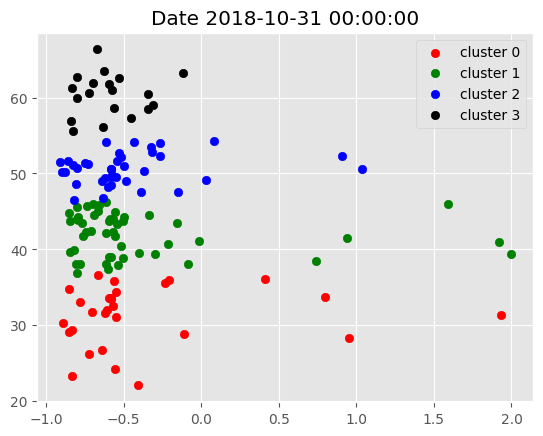

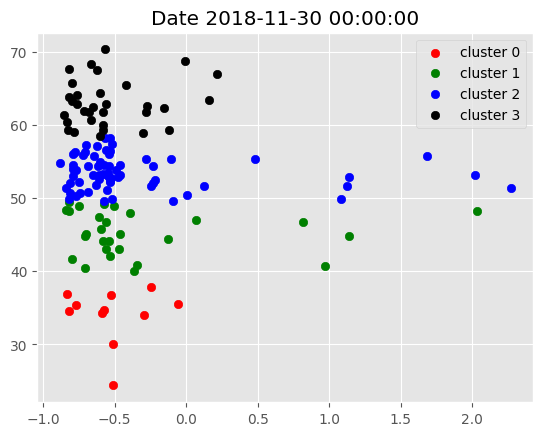

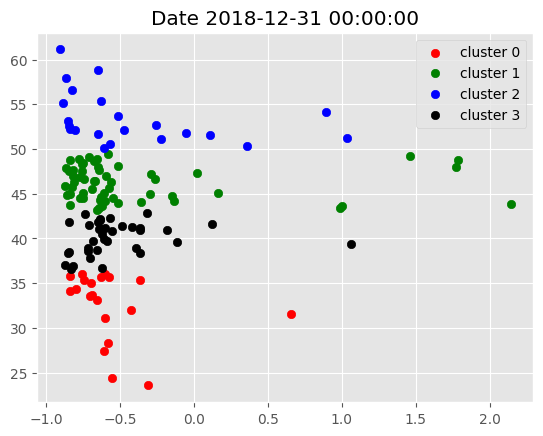

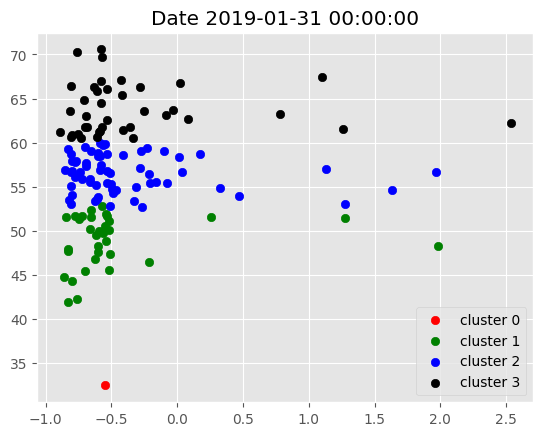

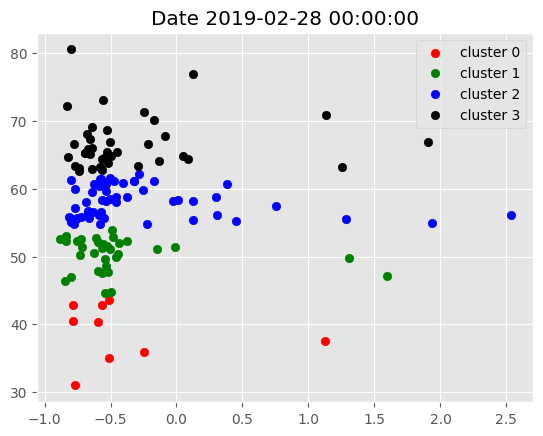

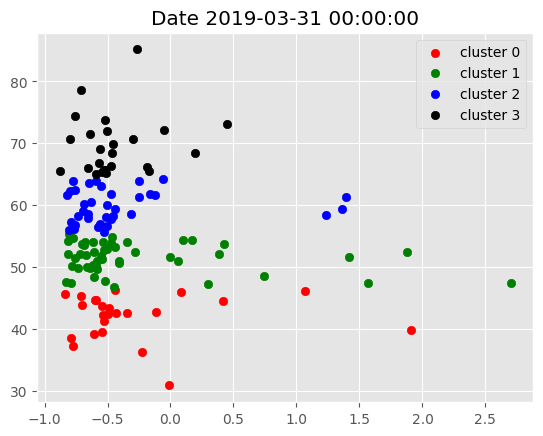

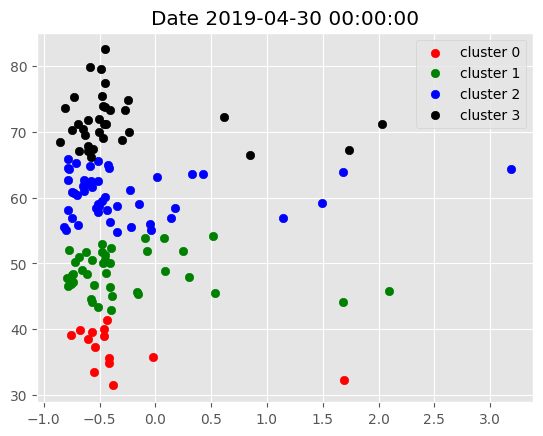

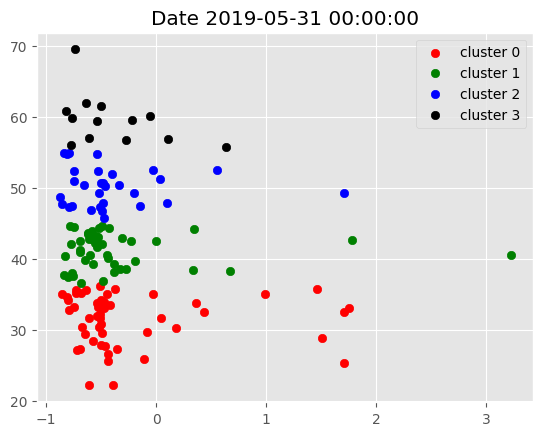

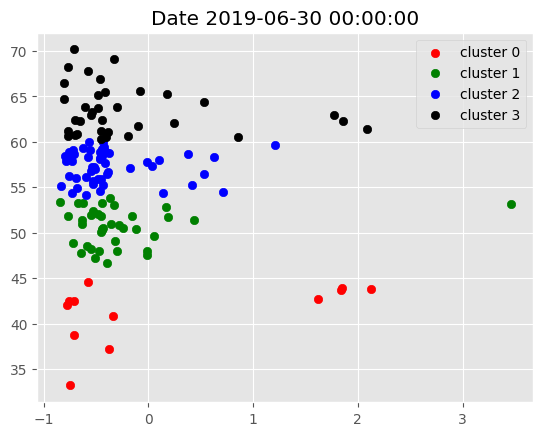

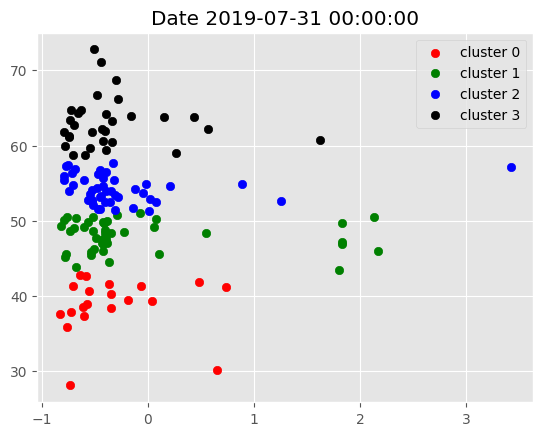

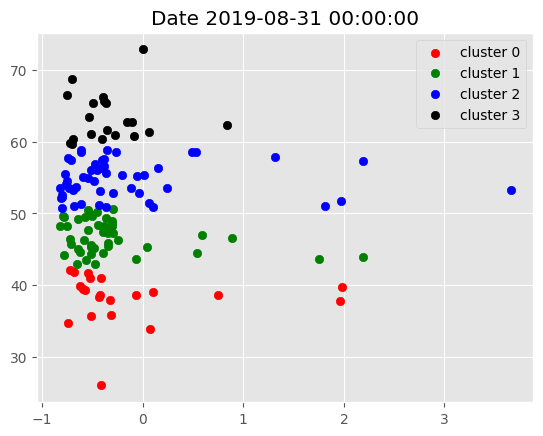

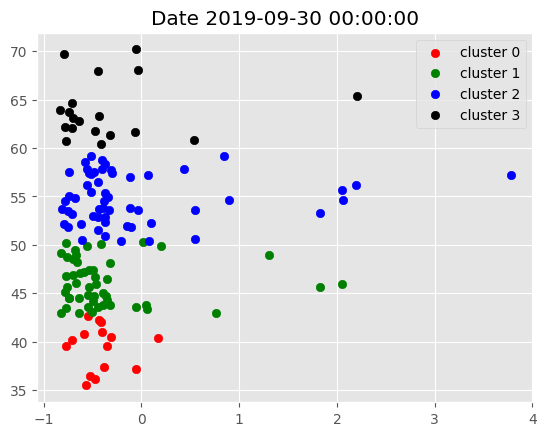

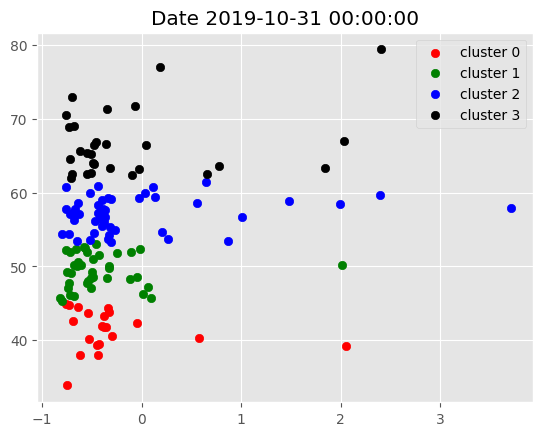

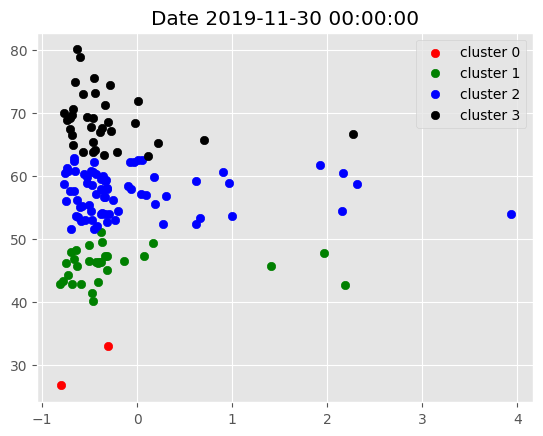

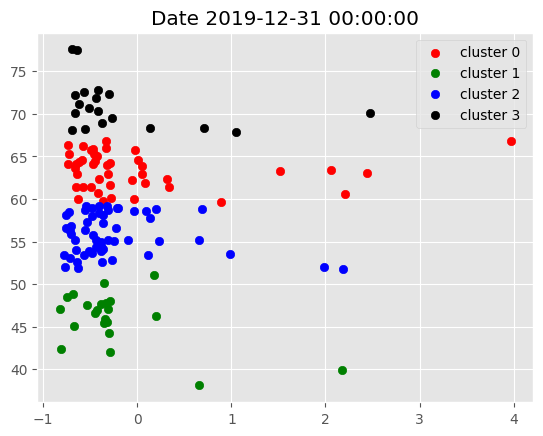

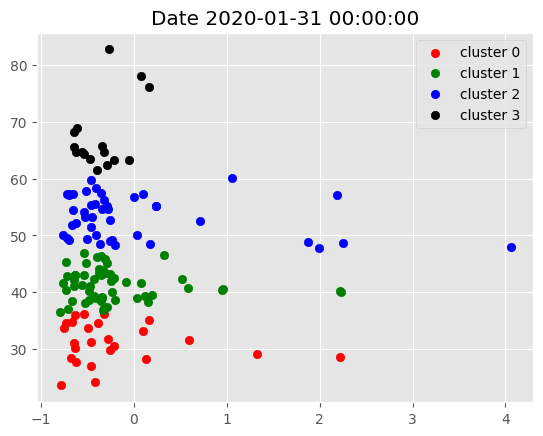

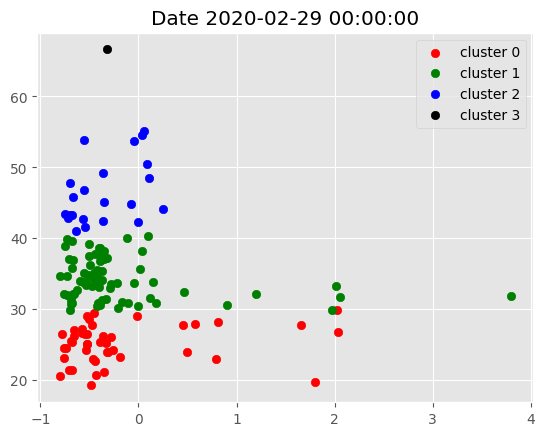

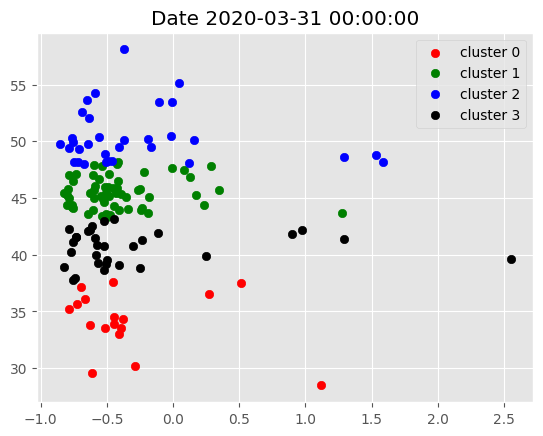

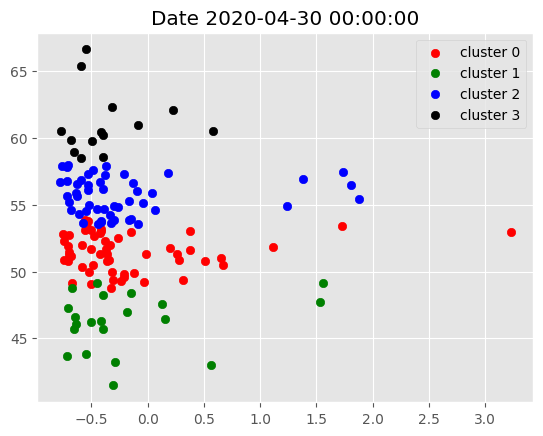

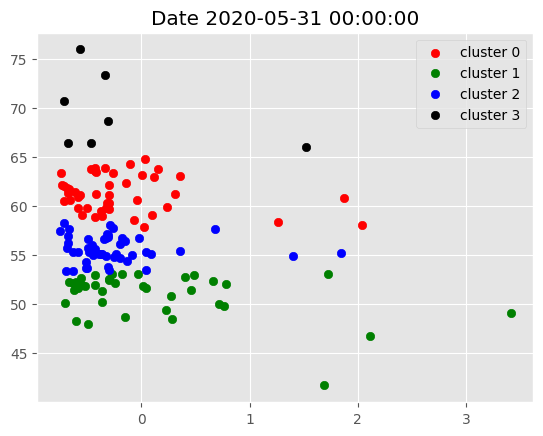

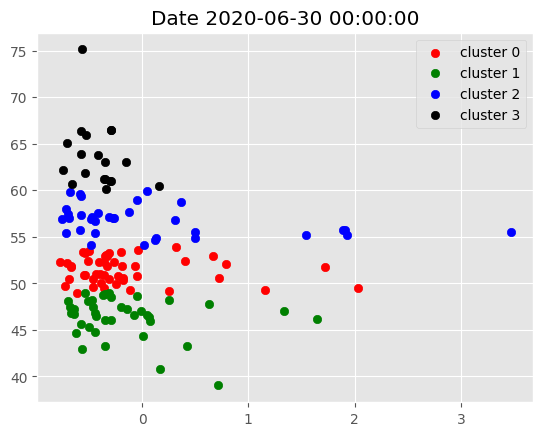

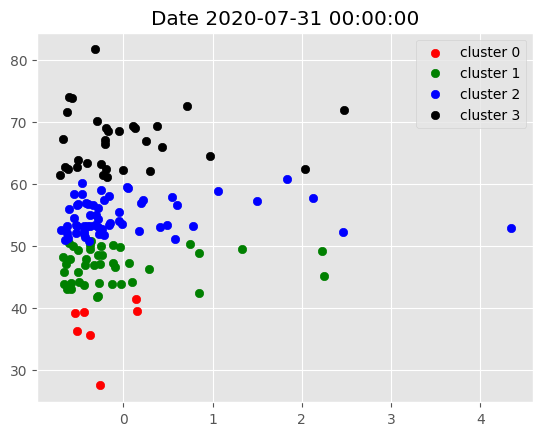

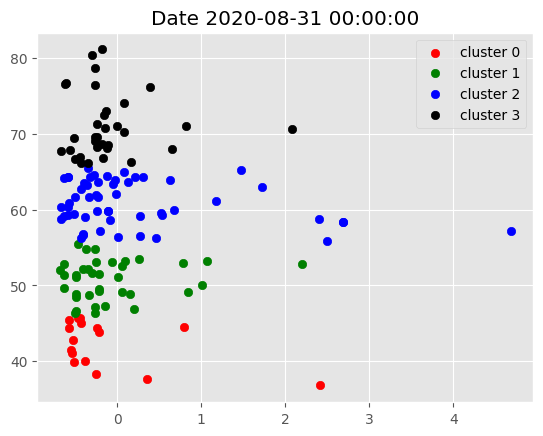

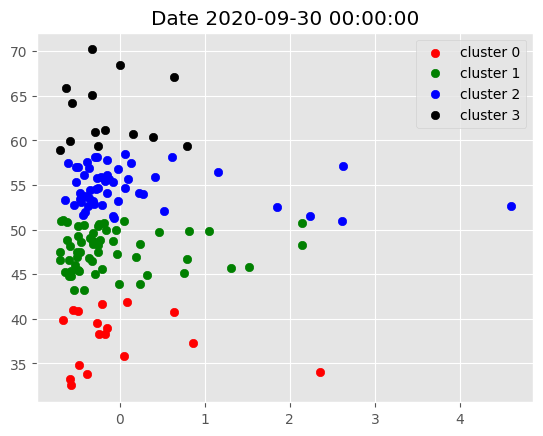

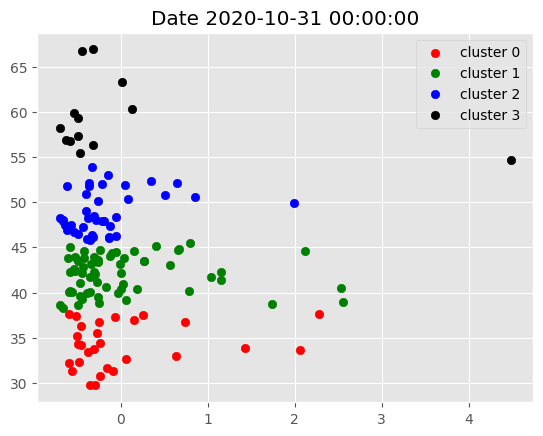

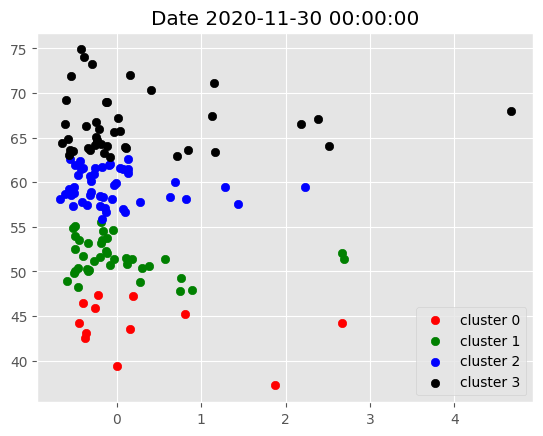

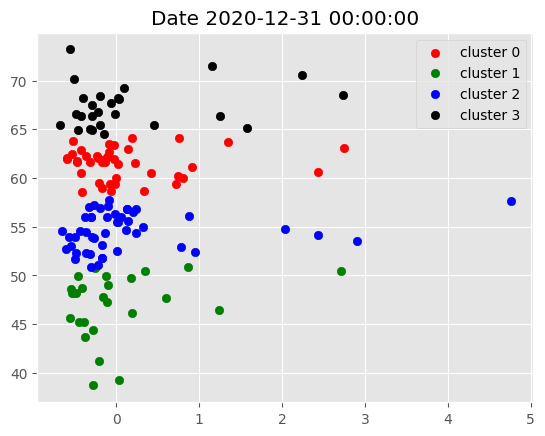

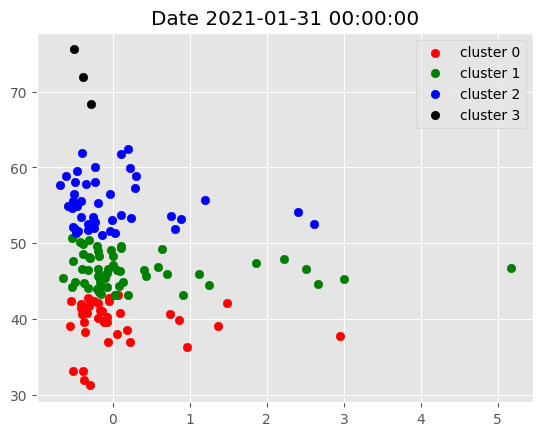

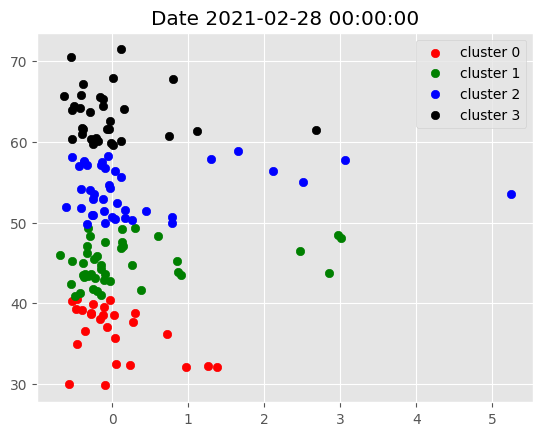

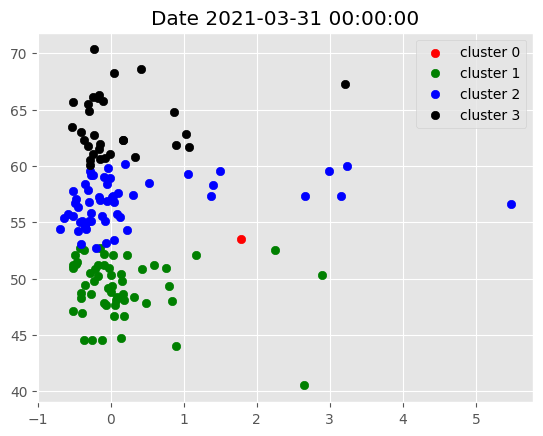

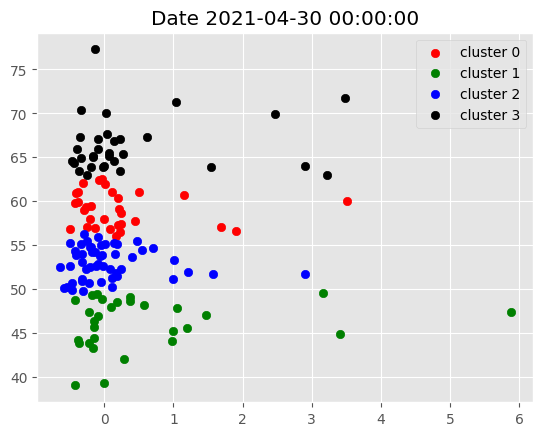

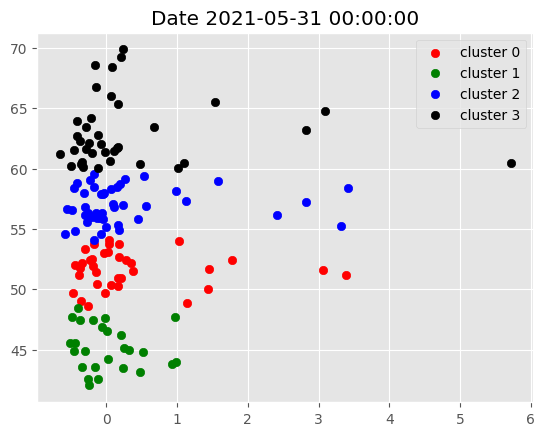

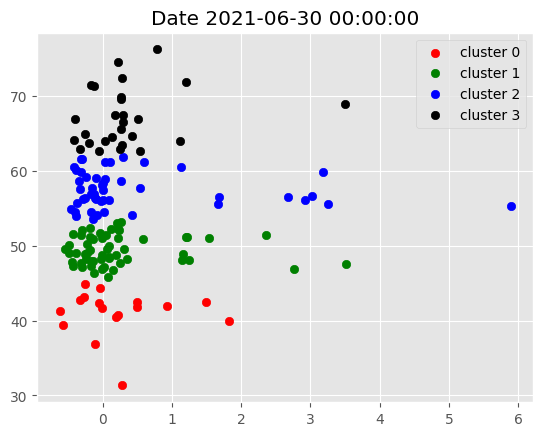

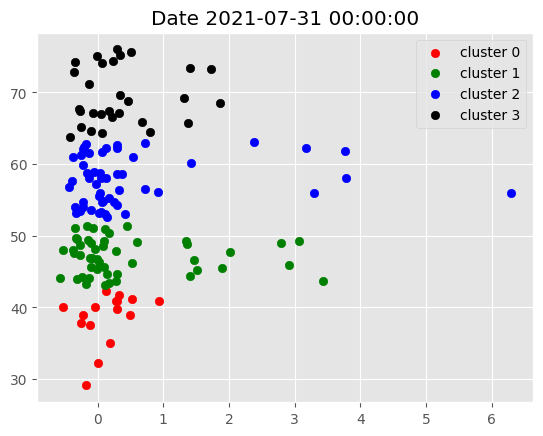

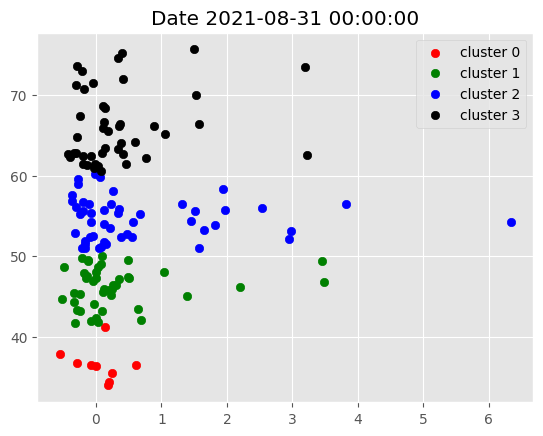

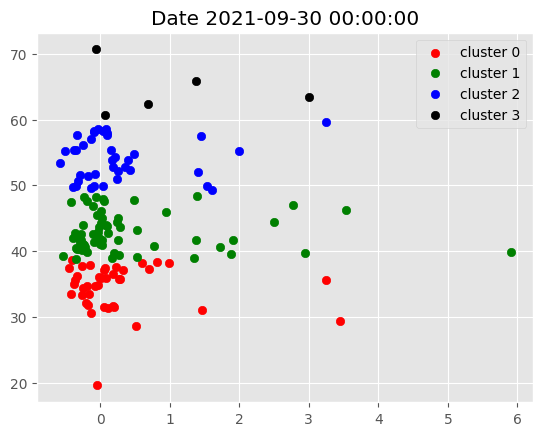

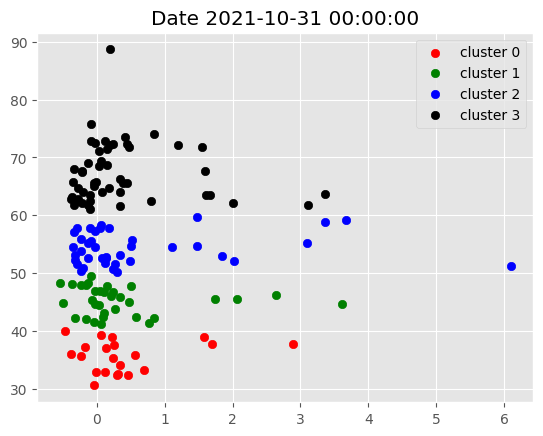

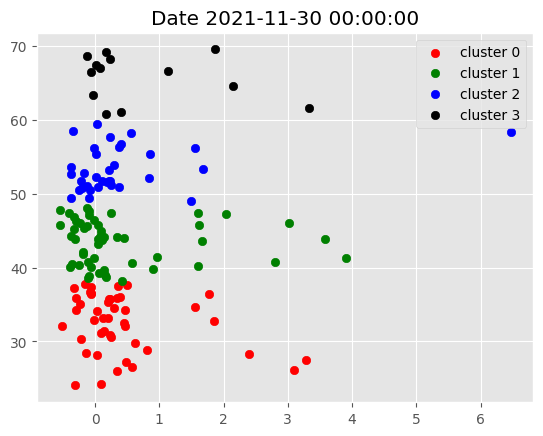

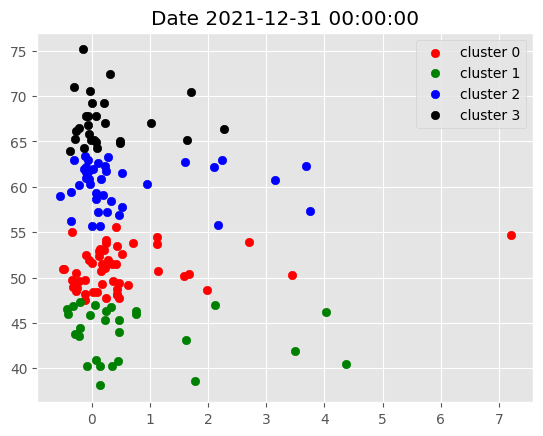

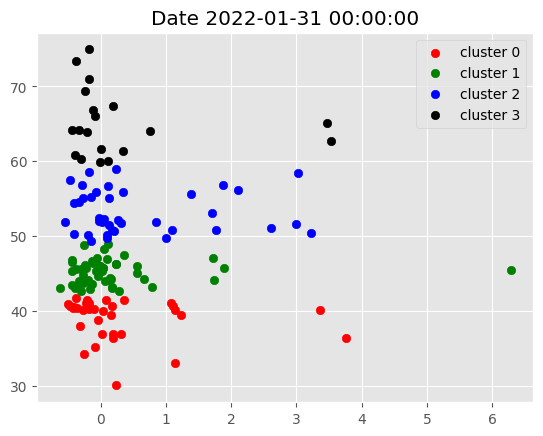

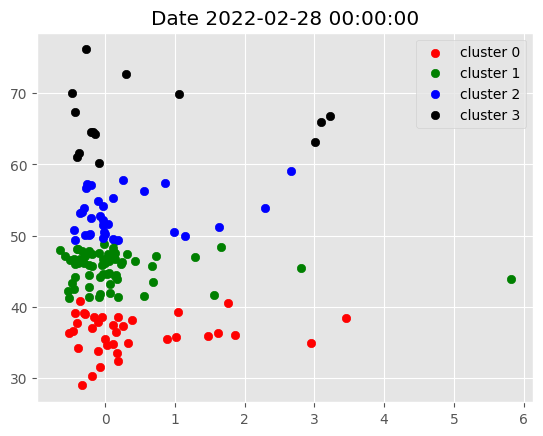

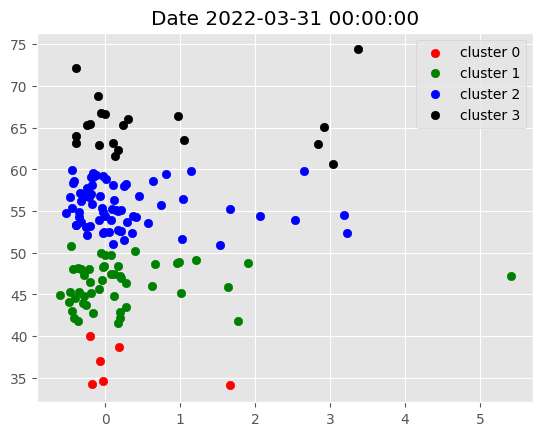

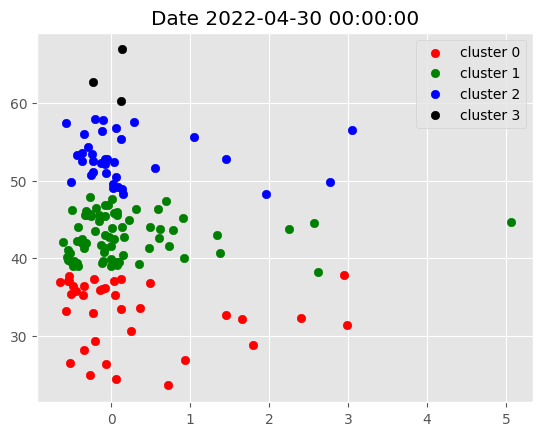

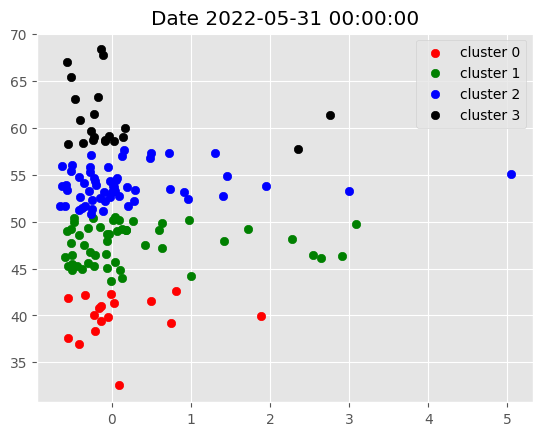

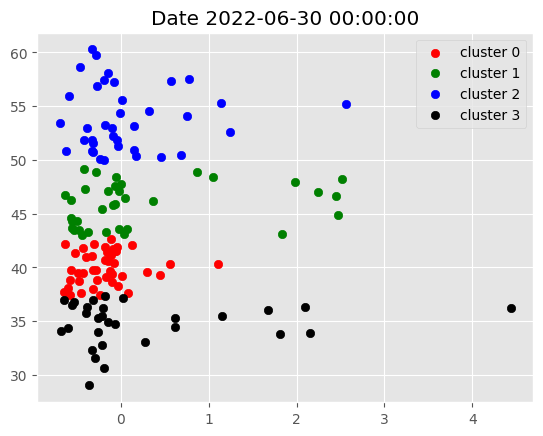

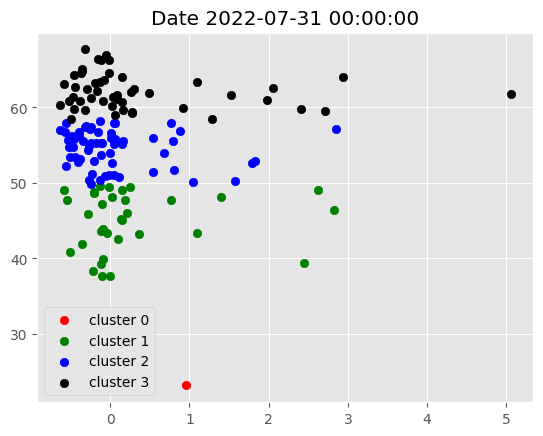

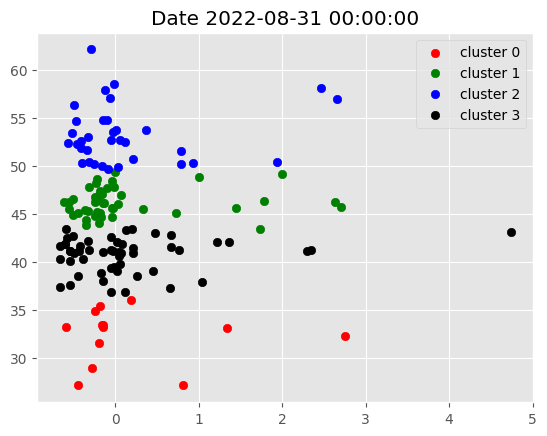

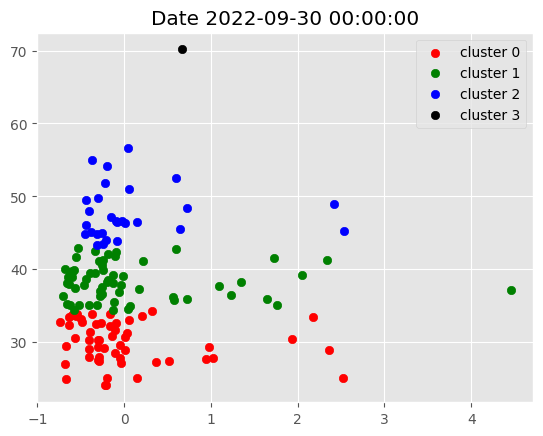

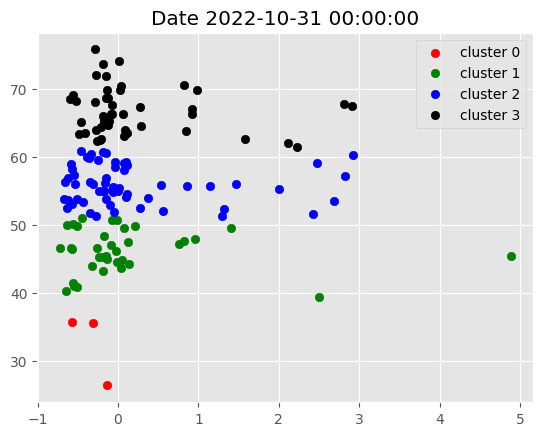

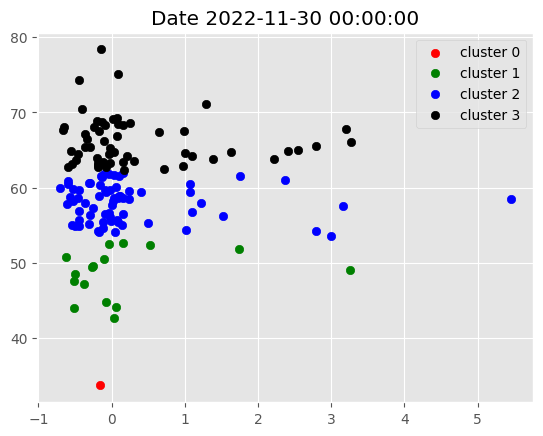

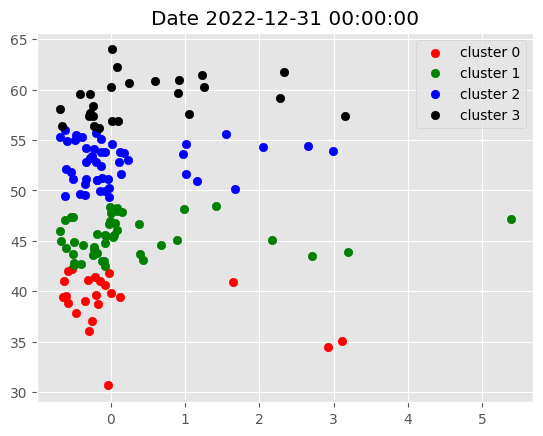

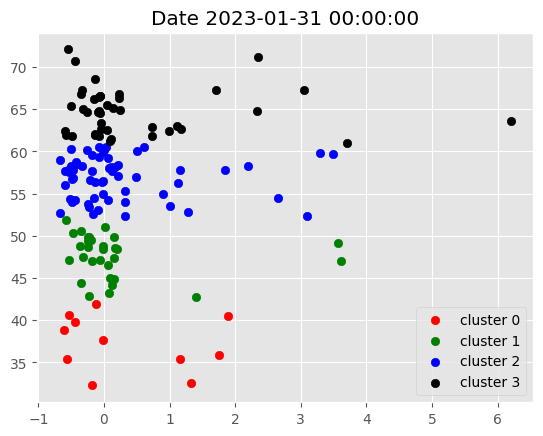

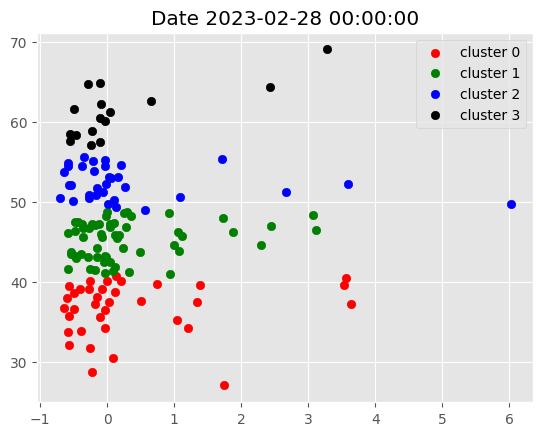

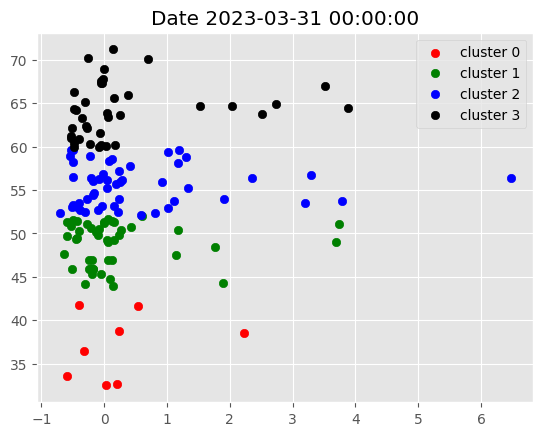

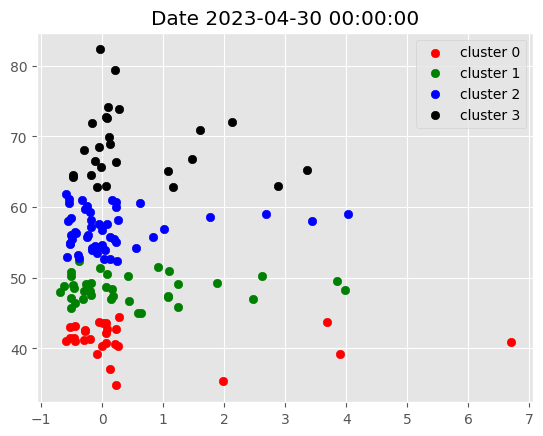

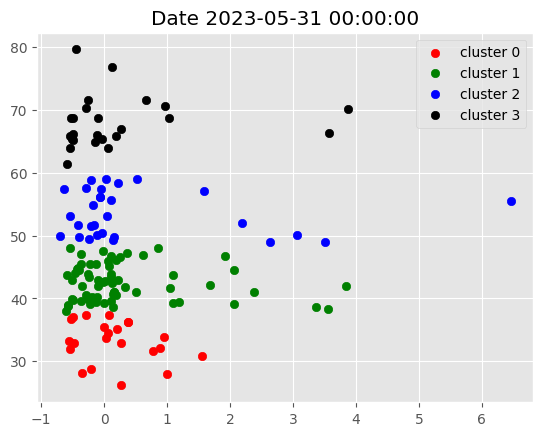

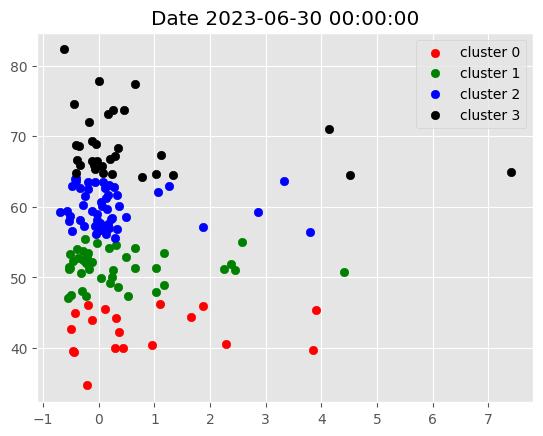

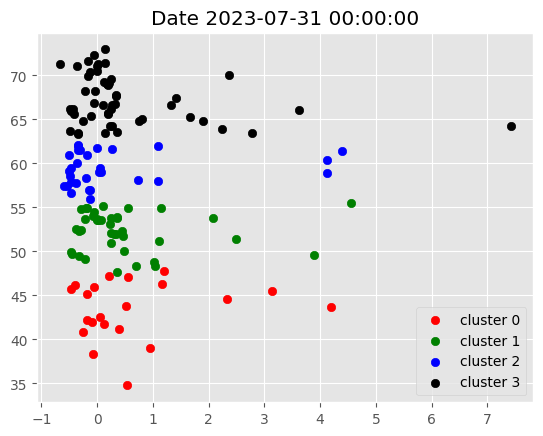

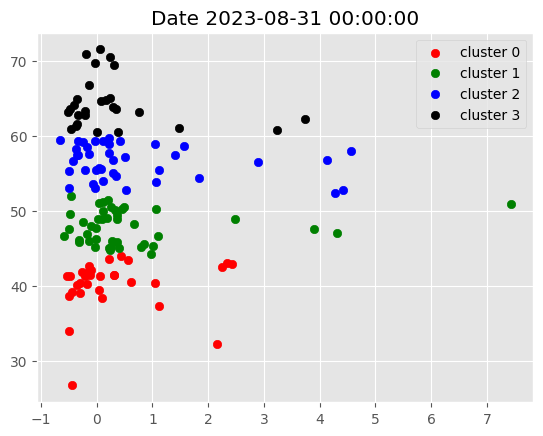

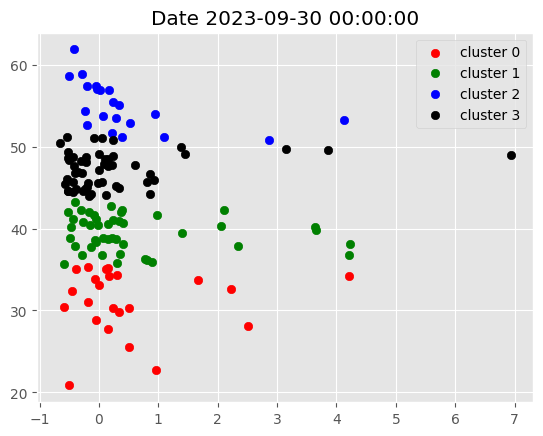

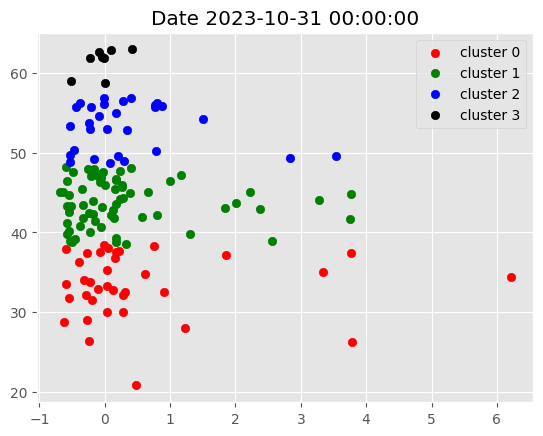

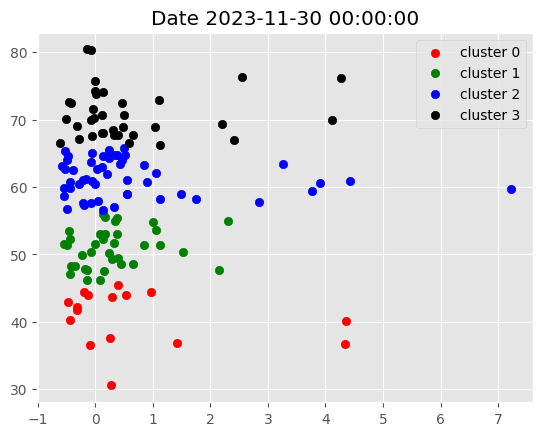

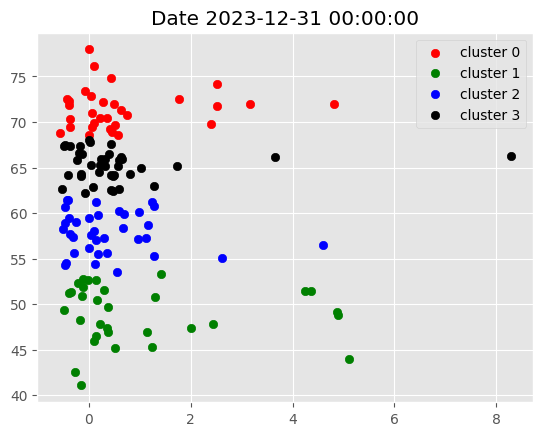

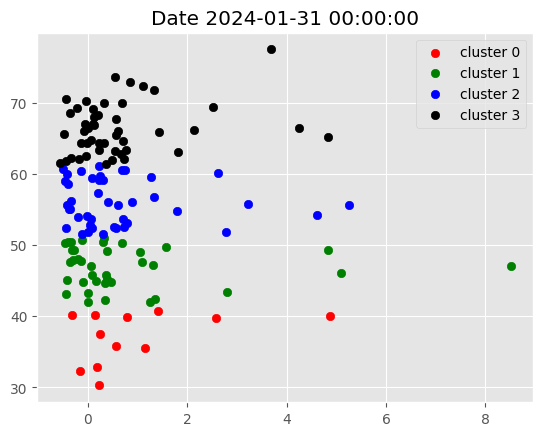

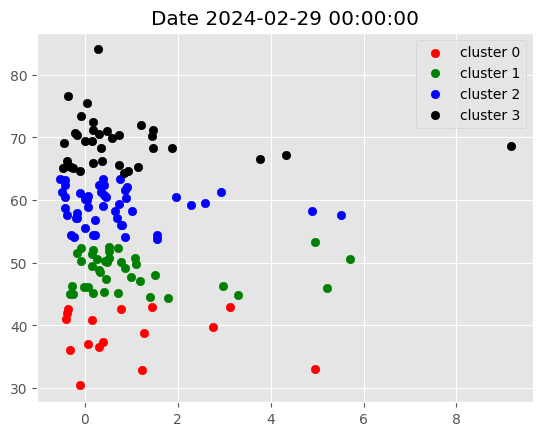

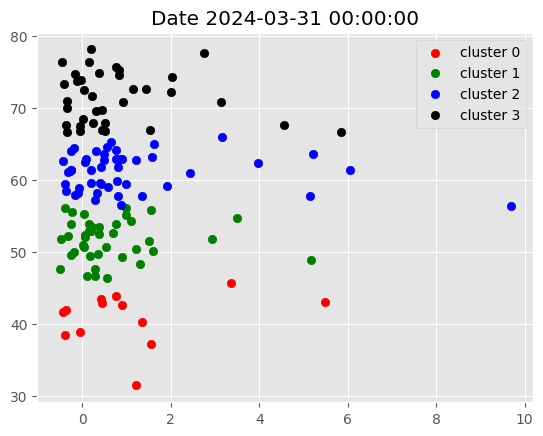

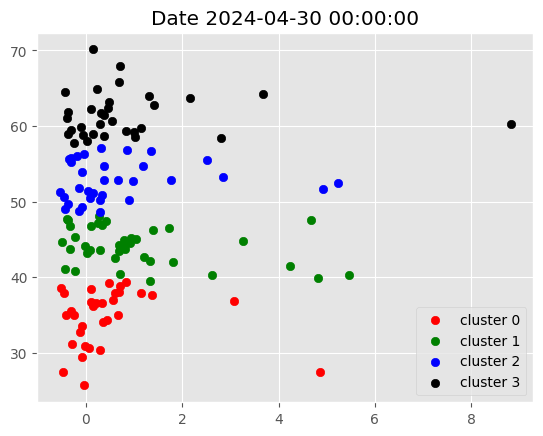

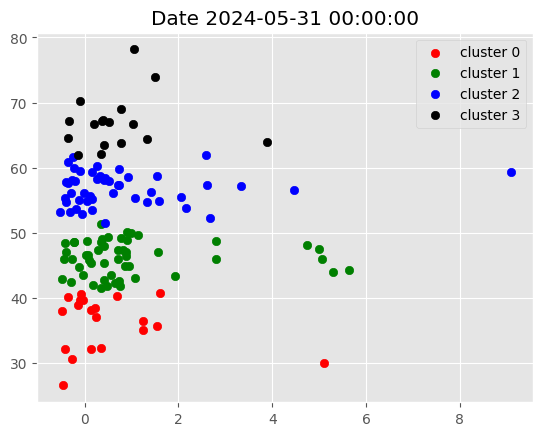

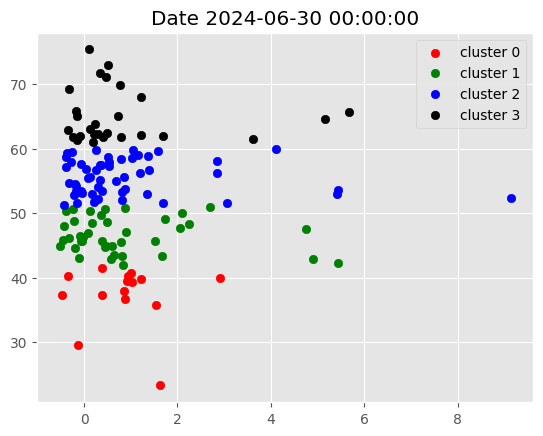

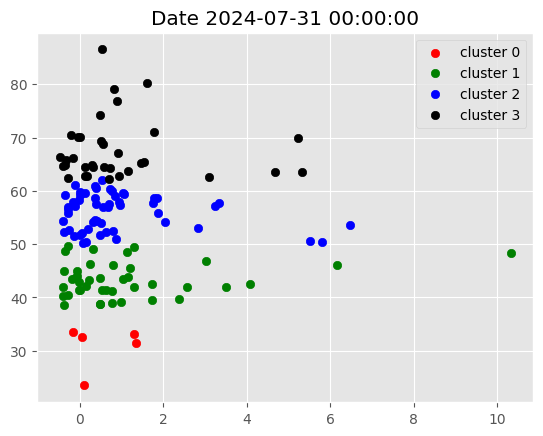

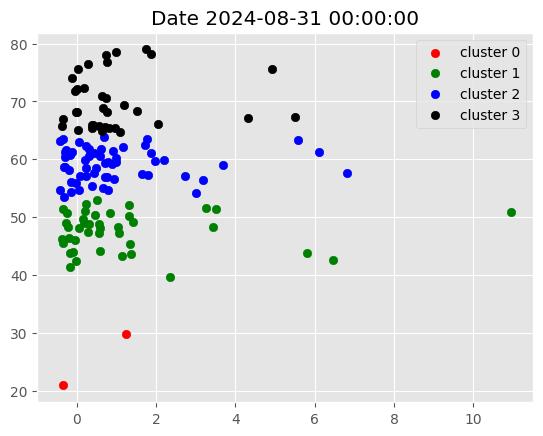

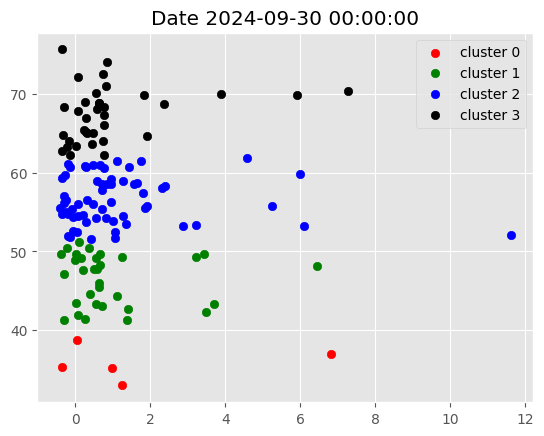

In [121]:
plt.style.use('ggplot')

for i in data.index.get_level_values('Date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

In [117]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))
initial_centroids[:, 1] = target_rsi_values

initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

## For each month selecting assests based on the cluster

### After that forming a portfolio based on Efficient Frontier max sharpe ratio optimization. 

First we will filter only stocks rresponding to the cluster we choose based on our hypothesis. 
Then the assumption is that as the momentum is persistent then, stocks clustered around RSI 70 centroid should continue to outperform in the following month - thus I would select stocks corresponding to cluster 3.

In [122]:
filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['Date', 'Ticker'])

dates = filtered_df.index.get_level_values('Date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2018-11-01': ['AMT',
  'CI',
  'CMCSA',
  'DG',
  'F',
  'GM',
  'JNJ',
  'KO',
  'KR',
  'MCD',
  'MO',
  'MRK',
  'PG',
  'PM',
  'SBUX',
  'TSLA',
  'VZ',
  'WBA',
  'WMT'],
 '2018-12-01': ['ABBV',
  'ABT',
  'AMGN',
  'AMT',
  'AXP',
  'BDX',
  'CI',
  'CMCSA',
  'CVS',
  'DAL',
  'DE',
  'DHR',
  'ELV',
  'GM',
  'JNJ',
  'KO',
  'LLY',
  'LRCX',
  'MCD',
  'MDLZ',
  'MDT',
  'MRK',
  'NEE',
  'PEP',
  'PFE',
  'PG',
  'SBUX',
  'TMO',
  'UAL',
  'UNH',
  'VZ',
  'WBA'],
 '2019-01-01': ['AAPL',
  'ACN',
  'ADP',
  'AXP',
  'BAC',
  'CHTR',
  'CI',
  'CMCSA',
  'COST',
  'CSX',
  'DAL',
  'EA',
  'EXPE',
  'FCX',
  'GILD',
  'HON',
  'HUM',
  'IBM',
  'JNJ',
  'JPM',
  'KR',
  'MCK',
  'META',
  'MPC',
  'MS',
  'MU',
  'NOC',
  'OXY',
  'T',
  'TGT',
  'TJX',
  'TMUS',
  'ULTA',
  'UPS',
  'VLO',
  'WFC'],
 '2019-02-01': ['ADI',
  'ADSK',
  'AMAT',
  'AMD',
  'AMT',
  'AVGO',
  'BA',
  'BDX',
  'C',
  'CHTR',
  'CMG',
  'CSCO',
  'DG',
  'DHR',
  'DLTR',
  'EBAY',
  'ELV',
  'GE

## Defining the portfolio Optimization function

Now we will define a function that optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio.

To optimize the weights of a given portfolio we would need to supply last 1 year prices to the function.

Apply single stock weight bounds constraint for diversification (minimum half of equaly weight and maximum 10% of portfolio).

In [123]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

downloading fresh daily prices data nly for the shortlisted stocks. 

In [125]:
stocks = data.index.get_level_values('Ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('Date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('Date').unique()[-1])

new_df

[*********************100%%**********************]  153 of 153 completed


Price        Adj Close                                                  \
Ticker            AAPL        ABBV         ABT         ACN        ADBE   
Date                                                                     
2017-10-31   39.667980   66.876801   48.237465  128.834732  175.160004   
2017-11-01   39.163448   68.499634   48.032883  129.377716  176.250000   
2017-11-02   39.449753   67.447372   48.361992  129.803024  180.940002   
2017-11-03   40.479923   68.403297   49.340446  130.355087  182.300003   
2017-11-06   40.890594   68.884979   48.931278  130.255524  180.800003   
...                ...         ...         ...         ...         ...   
2024-09-23  226.470001  193.830002  114.809998  339.209991  527.869995   
2024-09-24  227.369995  193.509995  113.339996  339.619995  524.070007   
2024-09-25  226.369995  191.259995  112.610001  337.049988  517.900024   
2024-09-26  227.520004  191.899994  112.730003  355.809998  515.380005   
2024-09-27  227.789993  194.789993  112.430000  349.700012  515.479980   

Price                                                                  ...  \
Ticker             ADI         ADP        ADSK        AIG        ALGN  ...   
Date                                                                   ...   
2017-10-31   79.939728  100.318497  124.959999  53.633965  238.979996  ...   
2017-11-01   79.668297   99.576447  124.779999  53.675461  234.949997  ...   
2017-11-02   79.493164   98.661774  124.720001  53.941101  233.470001  ...   
2017-11-03   80.386269   96.849747  124.849998  51.467354  241.350006  ...   
2017-11-06   80.797791   96.064507  123.820000  51.874096  244.500000  ...   
...                ...         ...         ...        ...         ...  ...   
2024-09-23  226.009995  277.579987  268.459991  74.300003  253.160004  ...   
2024-09-24  227.330002  276.640015  269.649994  73.419998  249.009995  ...   
2024-09-25  226.639999  275.250000  268.000000  73.019997  242.449997  ...   
2024-09-26  232.460007  274.429993  273.359985  73.120003  249.460007  ...   
2024-09-27  232.050003  272.880005  271.899994  73.339996  254.809998  ...   

Price         Volume                                                           \
Ticker             V      VLO     VRTX        VZ       WBA      WDC       WFC   
Date                                                                            
2017-10-31   8002500  3231000  2457100  15910000  12224700  5661000  14619200   
2017-11-01   6167300  4097800  2412600  11046600   9702600  3780000  11678300   
2017-11-02   5506600  4972900  2050000  13126900   8042600  2605600  15630000   
2017-11-03   3757600  3390500  1884900   8038200  14066400  2942700  10049200   
2017-11-06   4094700  3326200  1608300  36443300   5949600  3084300  10414900   
...              ...      ...      ...       ...       ...      ...       ...   
2024-09-23   6505600  2817500   975000  18083200  15926200  2908200  14759300   
2024-09-24  13690200  3062700  1416400  15154000  17660800  6650000  16365600   
2024-09-25  11671300  3008500   778200  21990100  22620800  3791400  10555700   
2024-09-26   9552500  6296800   948200  15779600  19909500  8834900  34463400   
2024-09-27   6508500  2935800   710700  15656700  27366900  4091300  13529800   

Price                                     
Ticker           WMT      WYNN       XOM  
Date                                      
2017-10-31  18020700   3938100   9754200  
2017-11-01  18528300   3463900   9430000  
2017-11-02  15549300   1357300   7775500  
2017-11-03  19536300   1213700   6903500  
2017-11-06  15772200   1772800   9276700  
...              ...       ...       ...  
2024-09-23  12147300   1646700  16066300  
2024-09-24  14651100   4888100  11984900  
2024-09-25  14163800   2244100  13816000  
2024-09-26  17061100   8289500  16887900  
2024-09-27  11891300  11251200  15962000  

[1738 rows x 918 columns]

Calculate daily returns for each stock which could land up in our portfolio.

Then loop over each month start, select the stocks for the month and calculate their weights for the next month.

If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.

Calculated each day portfolio return.

In [131]:
import numpy as np
import pandas as pd

# Assuming new_df and fixed_dates are already defined

returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    try:
        end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')

        optimization_df = new_df.loc[optimization_start_date:optimization_end_date, 'Adj Close'][cols]

        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                       lower_bound=round(1 / (len(optimization_df.columns) * 2), 3))

            weights = pd.DataFrame(weights, index=optimization_df.columns, columns=['weight'])
            success = True
        except Exception as e:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights: {e}')

        if not success:
            weights = pd.DataFrame([1 / len(optimization_df.columns) for _ in range(len(optimization_df.columns))],
                                   index=optimization_df.columns.tolist(),
                                   columns=['weight'])

        temp_df = returns_dataframe.loc[start_date:end_date]

        # Debugging: Print columns before merge
        print(f"Processing {start_date} to {end_date}")
        print("temp_df columns before merge:", temp_df.columns)
        print("weights columns before merge:", weights.columns)

        # Ensure weights DataFrame has the correct structure
        weights.index.name = 'Ticker'

        # Debugging: Print weights DataFrame structure
        print("weights DataFrame after renaming:")
        print(weights.head())

        temp_df = temp_df.stack().to_frame('return').reset_index()

        # Debugging: Print temp_df structure after stacking and resetting index
        print("temp_df after stacking and resetting index:")
        print(temp_df.head())

        temp_df = temp_df.merge(weights, left_on='Ticker', right_index=True)

        # Debugging: Print temp_df structure after merge
        print("temp_df after merge:")
        print(temp_df.head())

        temp_df = temp_df.set_index(['Date', 'Ticker']).unstack().stack()

        temp_df.index.names = ['Date', 'Ticker']

        temp_df['weighted_return'] = temp_df['return'] * temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Processing 2018-11-01 to 2018-11-30
temp_df columns before merge: Index(['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AIG',
       'ALGN',
       ...
       'V', 'VLO', 'VRTX', 'VZ', 'WBA', 'WDC', 'WFC', 'WMT', 'WYNN', 'XOM'],
      dtype='object', name='Ticker', length=153)
weights columns before merge: Index(['weight'], dtype='object')
weights DataFrame after renaming:
       weight
Ticker       
AMT       NaN
CI        NaN
CMCSA     NaN
DG        NaN
F         NaN
temp_df after stacking and resetting index:
        Date Ticker    return
0 2018-11-01   AAPL  0.015235
1 2018-11-01   ABBV  0.029865
2 2018-11-01    ABT  0.017399
3 2018-11-01    ACN  0.006072
4 2018-11-01   ADBE -0.001955
temp_df after merge:
         Date Ticker    return weight
13 2018-11-01    AMT -0.018068    NaN
31 2018-11-01     CI  0.011486    NaN
32 2018-11-01  CMCSA -0.004994    NaN
44 2018-11-01     DG  0.016032    NaN
54 2018-11-01      F -0.027602    NaN
Processing 2018-12-01 to 2018-12-31
tem

,Strategy Return
Date,
2018-11-01,0
2019-01-02,0.007717
2019-01-03,-0.020965
2019-01-04,0.036522
2019-01-07,0.008735
...,...
2023-11-24,0.002481
2023-11-27,-0.00556
2023-11-28,0.002558


## Visualize portfolio returns and comparing it to SP500

In [132]:
spy = yf.download(tickers='SPY',
                  start='2015-01-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%%**********************]  1 of 1 completed


,Strategy Return,SPY Buy&Hold
Date,,
2018-11-01,0,0.010585
2019-01-02,0.007717,0.001040
2019-01-03,-0.020965,-0.024152
2019-01-04,0.036522,0.032947
2019-01-07,0.008735,0.007854
...,...,...
2023-11-24,0.002481,0.000615
2023-11-27,-0.00556,-0.001803
2023-11-28,0.002558,0.000990


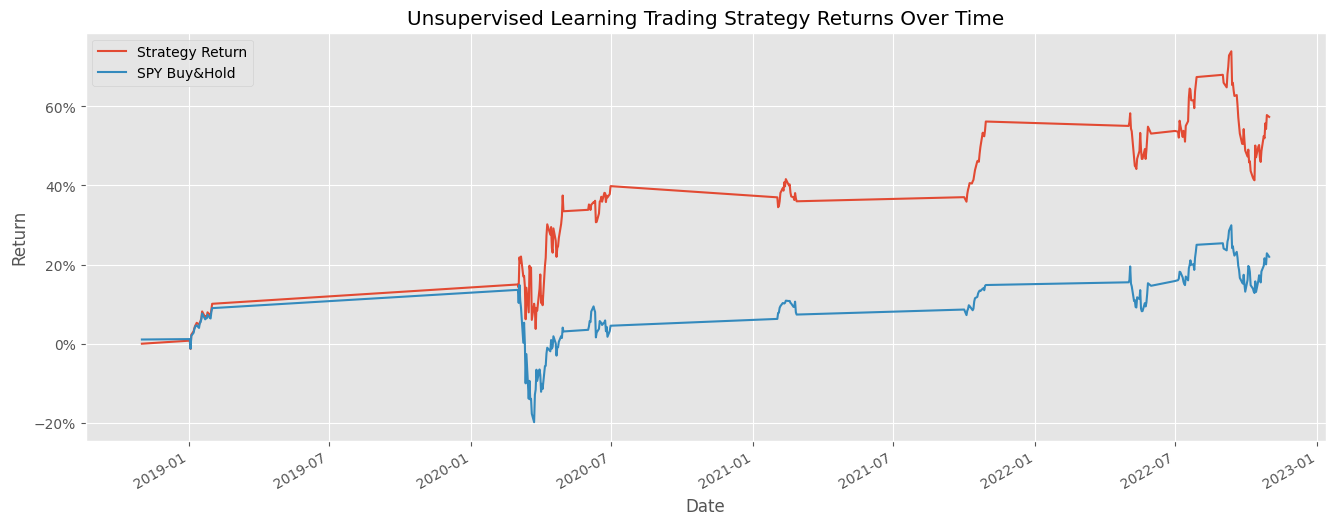

In [134]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

# Ensure all values in portfolio_df are floats
portfolio_df = portfolio_df.astype(float)

# Calculate cumulative returns
portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()) - 1

# Plot the cumulative returns
portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16, 6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylabel('Return')
plt.show()